In [ ]:
Name-Gaurav pareek
Batch-DS2308


In [ ]:
Rainfall Weather Forecasting
Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given 
location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a 
given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather 
observations of different locations in Australia. Here, predict two things:
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.
Dataset Description:
Number of columns: 23
Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3

In [9]:
import pandas as pd
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('weatherAUS.csv')

In [11]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [12]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 8425
No of Columns: 23


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#date is in object format need to convert in date time format

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [16]:

#dropping original date column

df.drop('Date',axis = 1, inplace = True)



In [17]:
df.shape

(8425, 25)

In [18]:
df.sample(10)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
1117  CoffsHarbour     10.2     21.1       1.4          1.8      11.2   
7825  PerthAirport     14.9     21.8      15.8          2.0       3.4   
6320      Brisbane      5.3     22.1       0.0          6.4      10.2   
3722   Williamtown     13.7     27.0       0.0         10.0      10.7   
5609     Melbourne      4.5     15.9       0.0          2.6       2.0   
7611  PerthAirport     11.4     21.8       0.8          4.8      10.8   
7957  PerthAirport     21.0     37.7       0.0         14.4      10.2   
6484      Brisbane     20.6     30.3       0.0         10.0       8.8   
8130  PerthAirport     13.0     20.6       0.0          3.0       1.1   
4668     Melbourne     14.1     22.4       0.0          6.2      10.3   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
1117          SE           28.0         SW         SE  ...       1016.3   
7825         NNW           46.0        NNW         NW  ...       1014.0   
6320           W           37.0        WNW        WNW  ...       1008.0   
3722          SE           48.0         SE        ESE  ...       1019.4   
5609           N           78.0          N          N  ...       1012.7   
7611         WSW           41.0        WSW          W  ...       1017.6   
7957           E           59.0         NE         SW  ...       1008.4   
6484          SE           35.0        SSE         SE  ...       1011.9   
8130         NNE           43.0        NNE         NE  ...       1020.3   
4668         SSE           41.0        SSE          S  ...       1020.2   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
1117       1.0       2.0     17.0     19.9        Yes            No    6   
7825       8.0       7.0     16.6     21.1        Yes           Yes    6   
6320       1.0       3.0     16.4     21.4         No            No    9   
3722       2.0       2.0     23.1     26.3         No            No    7   
5609       7.0       7.0     14.5     14.7         No            No   10   
7611       7.0       3.0     17.0     20.1         No            No    6   
7957       6.0       7.0     30.3     37.0         No            No   16   
6484       7.0       4.0     26.7     27.5         No            No   20   
8130       7.0       8.0     17.1     19.7         No            No    7   
4668       7.0       3.0     17.9     22.1         No            No    2   

      Month  Year  
1117     10  2009  
7825      8  2013  
6320      8  2011  
3722     12  2015  
5609      7  2010  
7611     11  2012  
7957     12  2013  
6484      1  2012  
8130      6  2014  
4668      3  2010  

[10 rows x 25 columns]

In [19]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [20]:
df['RainTomorrow'].isnull().sum()

239

In [21]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

1663

If we just check CSV File we can find that there are some missing value in dataset which shown fill with '?'

In [22]:
df.isin([' ?']).sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [23]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Day', 'Month', 'Year'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

Missing value check

In [24]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

EDA

In [25]:
# Checking the nunique values in each columns-
df.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

In [26]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print('='*100)


Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
Evaporation
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evap

Exploratory Data Analysis

<AxesSubplot:>

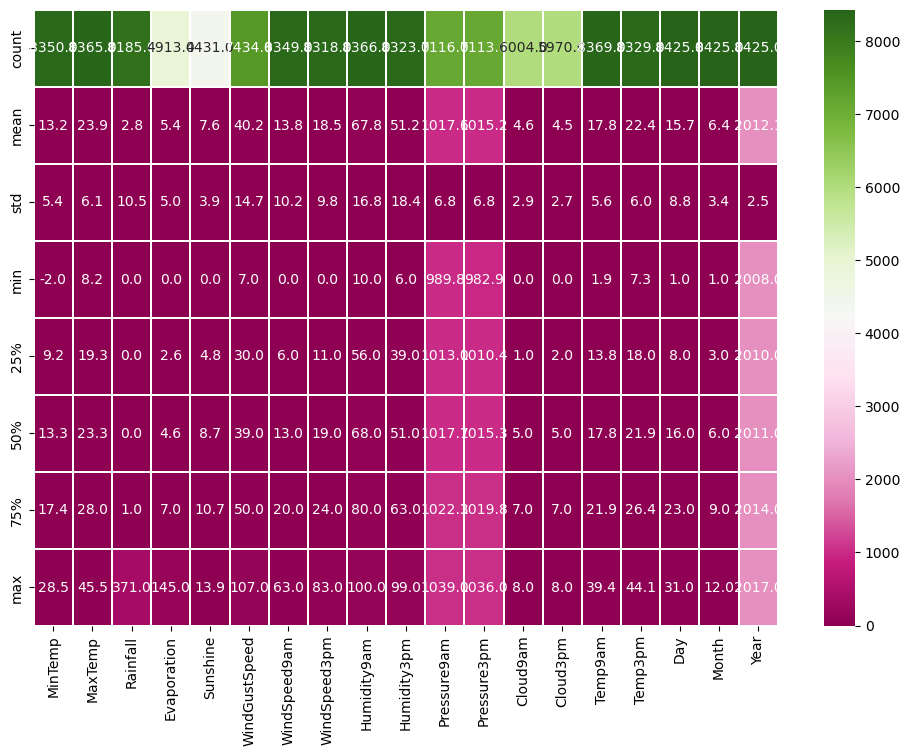

In [27]:

# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [87]:
df.describe().T

count         mean        std     min      25%     50%  \
MinTemp        8350.0    13.193305   5.403596    -2.0     9.20    13.3   
MaxTemp        8365.0    23.859976   6.136408     8.2    19.30    23.3   
Rainfall       8185.0     2.805913  10.459379     0.0     0.00     0.0   
Evaporation    4913.0     5.389395   5.044484     0.0     2.60     4.6   
Sunshine       4431.0     7.632205   3.896235     0.0     4.75     8.7   
WindGustSpeed  7434.0    40.174469  14.665721     7.0    30.00    39.0   
WindSpeed9am   8349.0    13.847646  10.174579     0.0     6.00    13.0   
WindSpeed3pm   8318.0    18.533662   9.766986     0.0    11.00    19.0   
Humidity9am    8366.0    67.822496  16.833283    10.0    56.00    68.0   
Humidity3pm    8323.0    51.249790  18.423774     6.0    39.00    51.0   
Pressure9am    7116.0  1017.640233   6.828699   989.8  1013.00  1017.7   
Pressure3pm    7113.0  1015.236075   6.766681   982.9  1010.40  1015.3   
Cloud9am       6004.0     4.566622   2.877658     0.0     1.00     5.0   
Cloud3pm       5970.0     4.503183   2.731659     0.0     2.00     5.0   
Temp9am        8369.0    17.762015   5.627035     1.9    13.80    17.8   
Temp3pm        8329.0    22.442934   5.980020     7.3    18.00    21.9   
Day            8425.0    15.741958   8.787354     1.0     8.00    16.0   
Month          8425.0     6.442136   3.437994     1.0     3.00     6.0   
Year           8425.0  2012.102433   2.473137  2008.0  2010.00  2011.0   

                  75%     max  
MinTemp          17.4    28.5  
MaxTemp          28.0    45.5  
Rainfall          1.0   371.0  
Evaporation       7.0   145.0  
Sunshine         10.7    13.9  
WindGustSpeed    50.0   107.0  
WindSpeed9am     20.0    63.0  
WindSpeed3pm     24.0    83.0  
Humidity9am      80.0   100.0  
Humidity3pm      63.0    99.0  
Pressure9am    1022.3  1039.0  
Pressure3pm    1019.8  1036.0  
Cloud9am          7.0     8.0  
Cloud3pm          7.0     8.0  
Temp9am          21.9    39.4  
Temp3pm          26.4    44.1  
Day              23.0    31.0  
Month             9.0    12.0  
Year           2014.0  2017.0

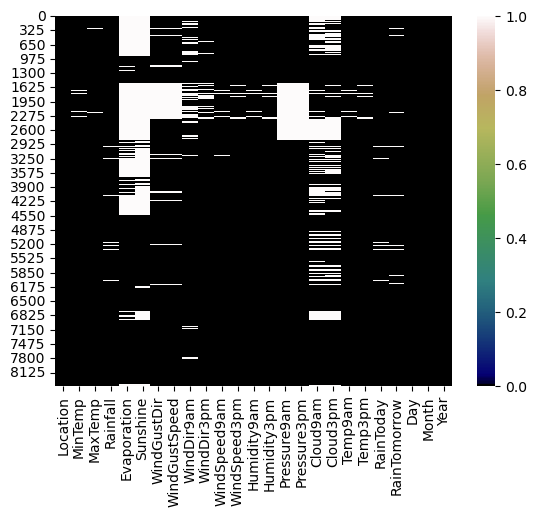

In [28]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()



There are null values present in the dataset


In [29]:
numerical_col =[]
categorical_col = []
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0],inplace = True)   
        categorical_col.append(i)
    elif df[i].dtypes == 'float64':
        df[i].fillna(np.mean(df[i]),inplace = True)
        numerical_col.append(i)

In [30]:
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [31]:
categorical_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [32]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.379488     6.114516    10.309308     3.852004     2.825451   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.632205   
50%      13.200000    23.300000     0.000000     5.389395     7.632205   
75%      17.300000    28.000000     1.400000     5.389395     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm          Day        Month         Year  
count  8425.000000  8425.000000  8425.000000  8425.000000  
mean     22.442934    15.741958     6.442136  2012.102433  
std       5.945849     8.787354     3.437994     2.473137  
min       7.300000     1.000000     1.000000  2008.000000  
25%      18.100000     8.000000     3.000000  2010.000000  
50%      22.000000    16.000000     6.000000  2011.000000  
75%      26.300000    23.000000     9.000000  2014.000000  
max      44.100000    31.000000    12.000000  2017.000000

In [ ]:
Notes-

Average max temperature observed as 23.85 deg celsiuswhile minimum was noted as 13.19 deg. 
Mean minimum temperature exist as 13.14 deg celsius Maximum Rainfall observed in a day is 371mm. 
The Max number of hours of bright sunshine in the day is 13.9 hours. 
The mean and median value is almost same in most of the columns which means there is less skewness present. 
The diference between 75 % and maximum value is huge , which means the presence of outliers present.


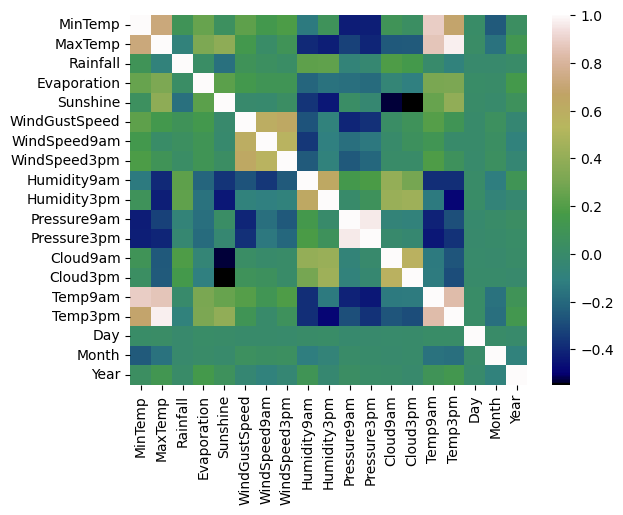

In [33]:
# Heatmap of correlation 
sns.heatmap(df.corr(),cmap="gist_earth")
plt.show()

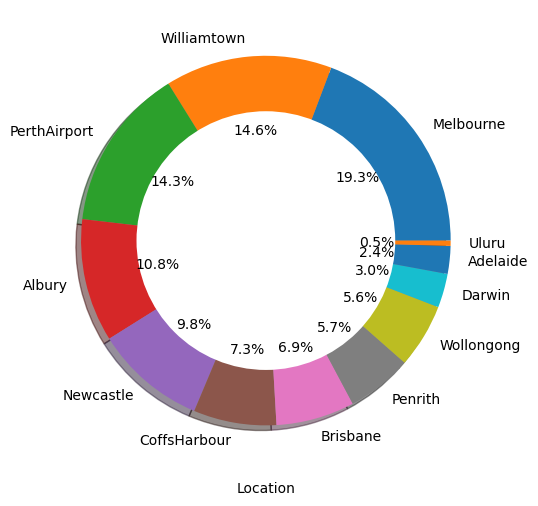

<Figure size 640x480 with 0 Axes>

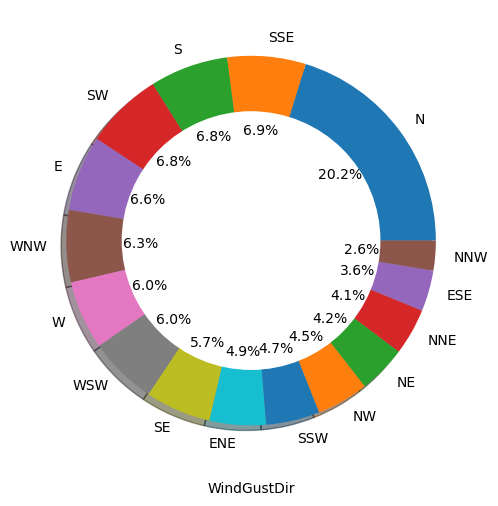

<Figure size 640x480 with 0 Axes>

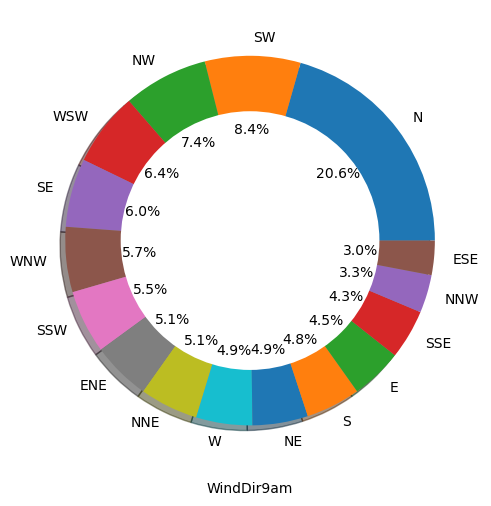

<Figure size 640x480 with 0 Axes>

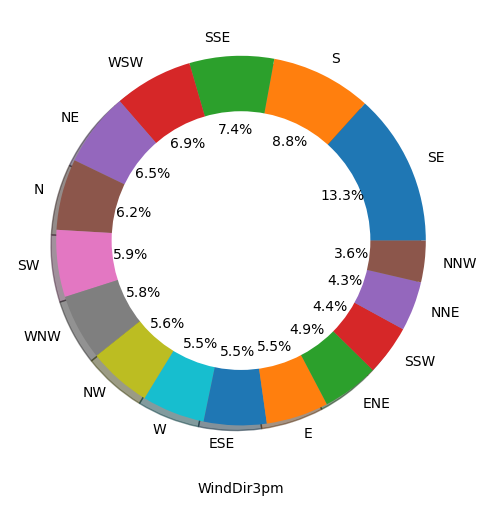

<Figure size 640x480 with 0 Axes>

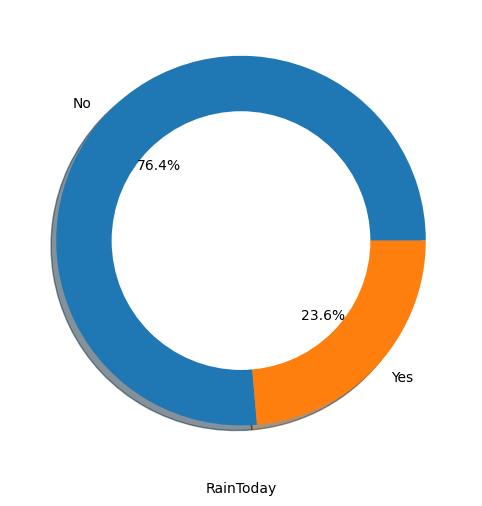

<Figure size 640x480 with 0 Axes>

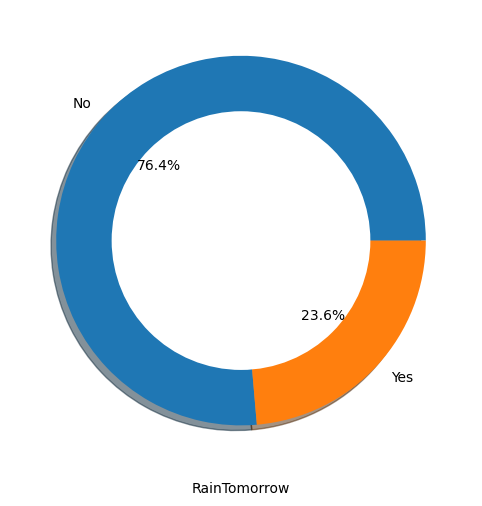

<Figure size 640x480 with 0 Axes>

In [34]:


for i in categorical_col:
    plt.figure(figsize=(8,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()





notes-Most areas recieve strongest windgust from north direction. Most rainfall areas are from North at 09.00 AM. Most rainfall 
areas are from South East at 03.00 PM.


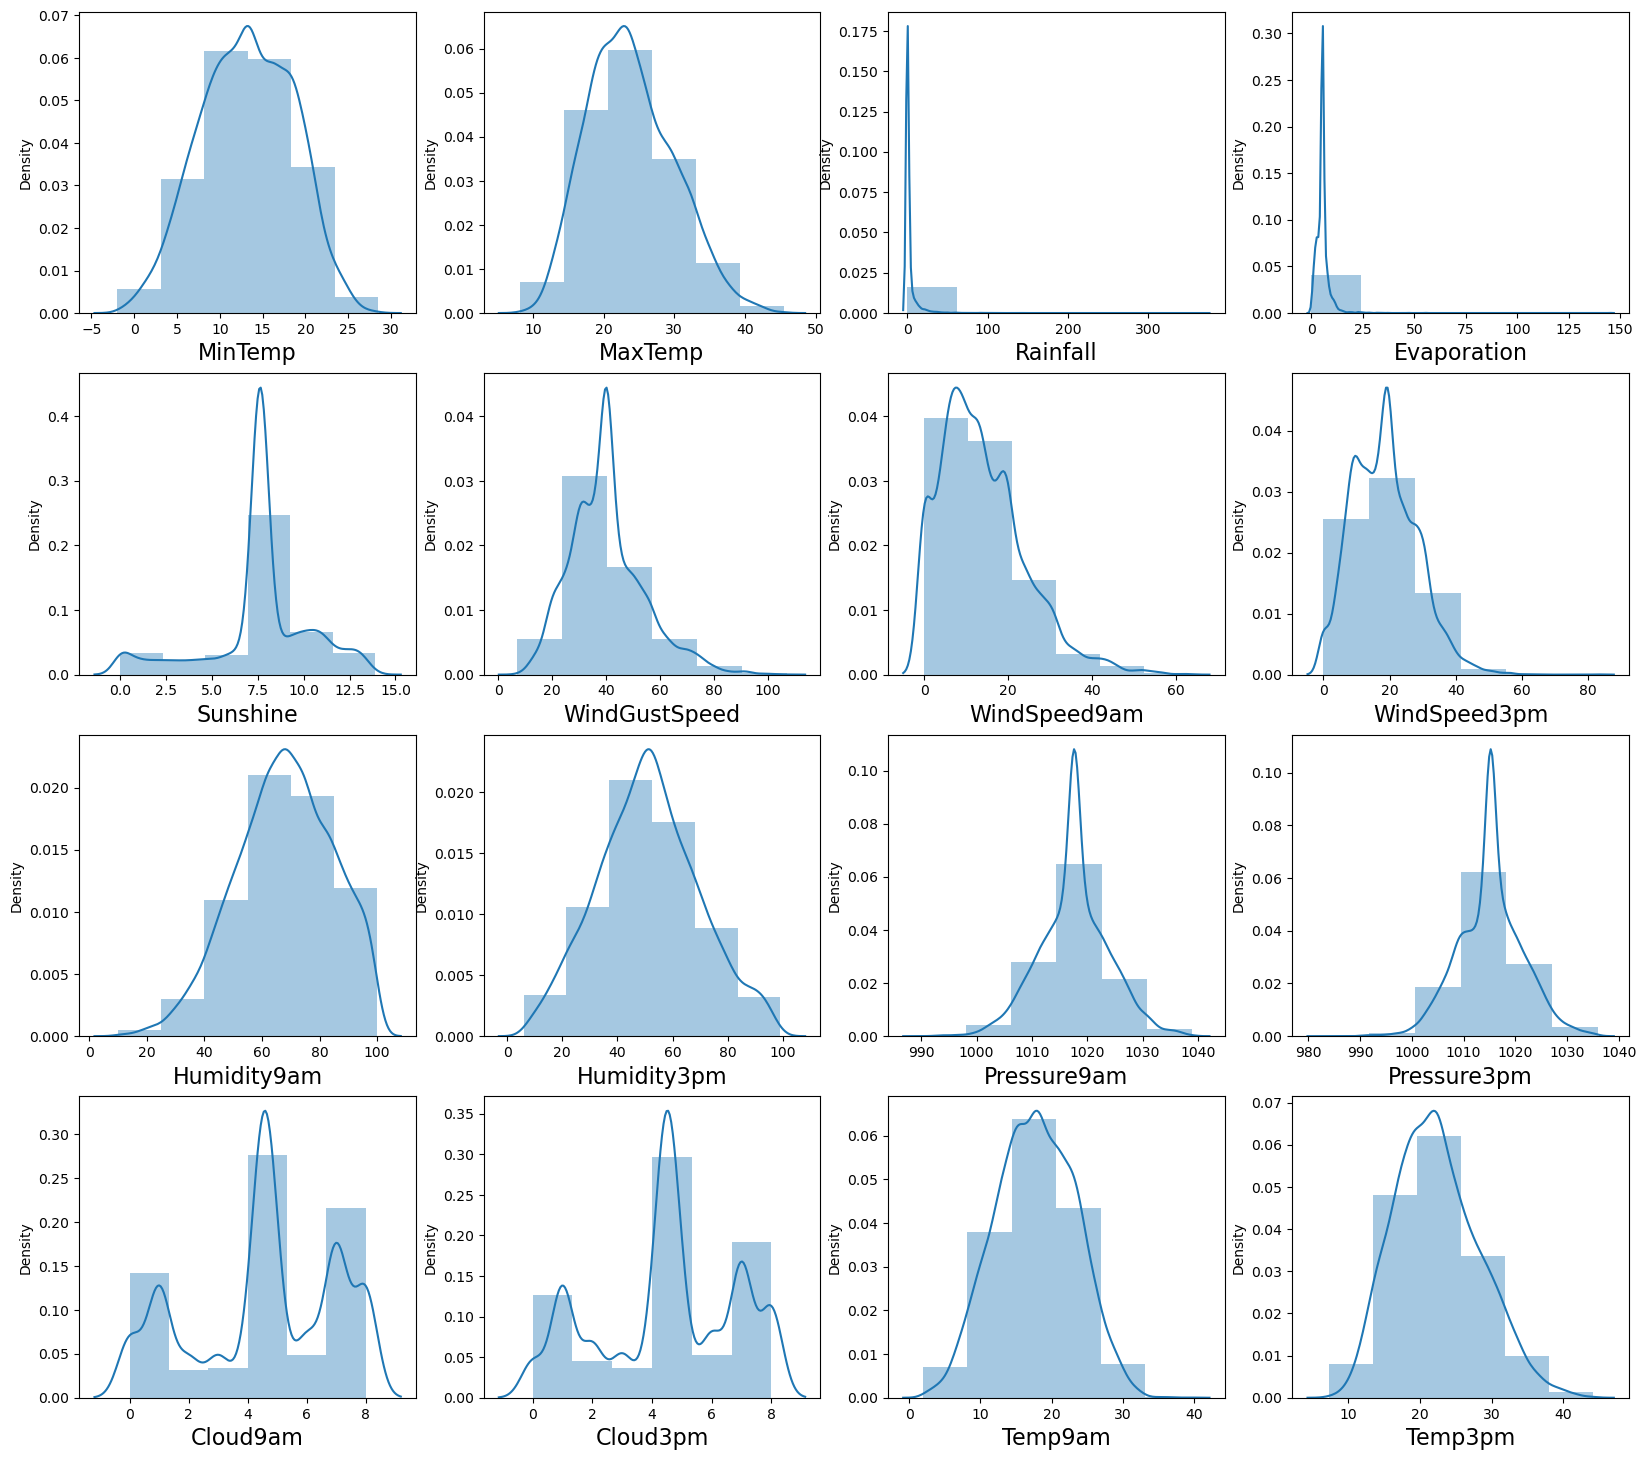

In [35]:


plotnumber = 1
plt.figure(figsize=(20,18))

for i in numerical_col:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[i],bins =6,kde=True)
        plt.xlabel(i,fontsize=16)
        plotnumber+=1
plt.show()



In [ ]:
Mostly minimum temperature between 8-18 celsius. Mostly maximum temperature between 14.4* to 33* celsius. The rainfall 
recorded for a day 
is between 0 to 61mm. Most areas are having Class-A evaporation in the 24 hours to 09.00 A.M is between 0 to 20mm, recieve 
6.95 to 9.2 hours of sunlight a day,recieve the strongest windgust with speed of 23 to 57km/h in the 24 hours to midnight, 
have humidity between 55 to 85% at 09.00 AM and humidity between 37 to 68% at 03:00 PM. The atmospheric pressure to mean sea 
    level at 09.00 AM is between 1014 to 1022 hpa and at 03:00 PM is between 1009 to 1018 hpa. There is sky obscured by 
        clouds at 09.00 AM is between 4-5.33 and 6.7 to 8 and at 03:00 PM is between 4 to 5.33 and 6.7 to 8. Mostly 
            temperature between 14 to 26.9* celsius at 09:00 AM and between 13.4 to 27* celsius at 
                03:00 PM.

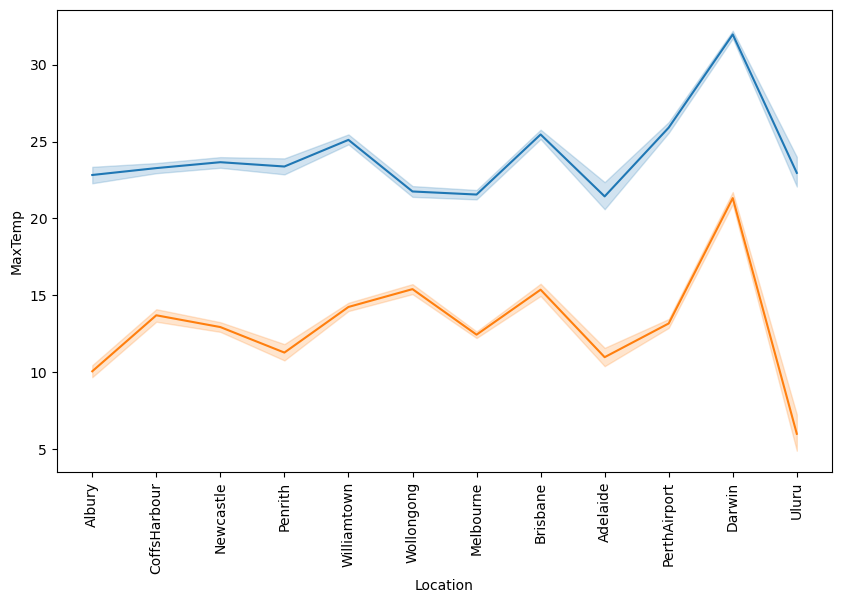

In [36]:


temp = ['MaxTemp','MinTemp']
plt.figure(figsize =[10,6])
for i in temp:
    sns.lineplot(x='Location',y =df[i], data = df)
    plt.xticks(rotation = 90)
plt.show()



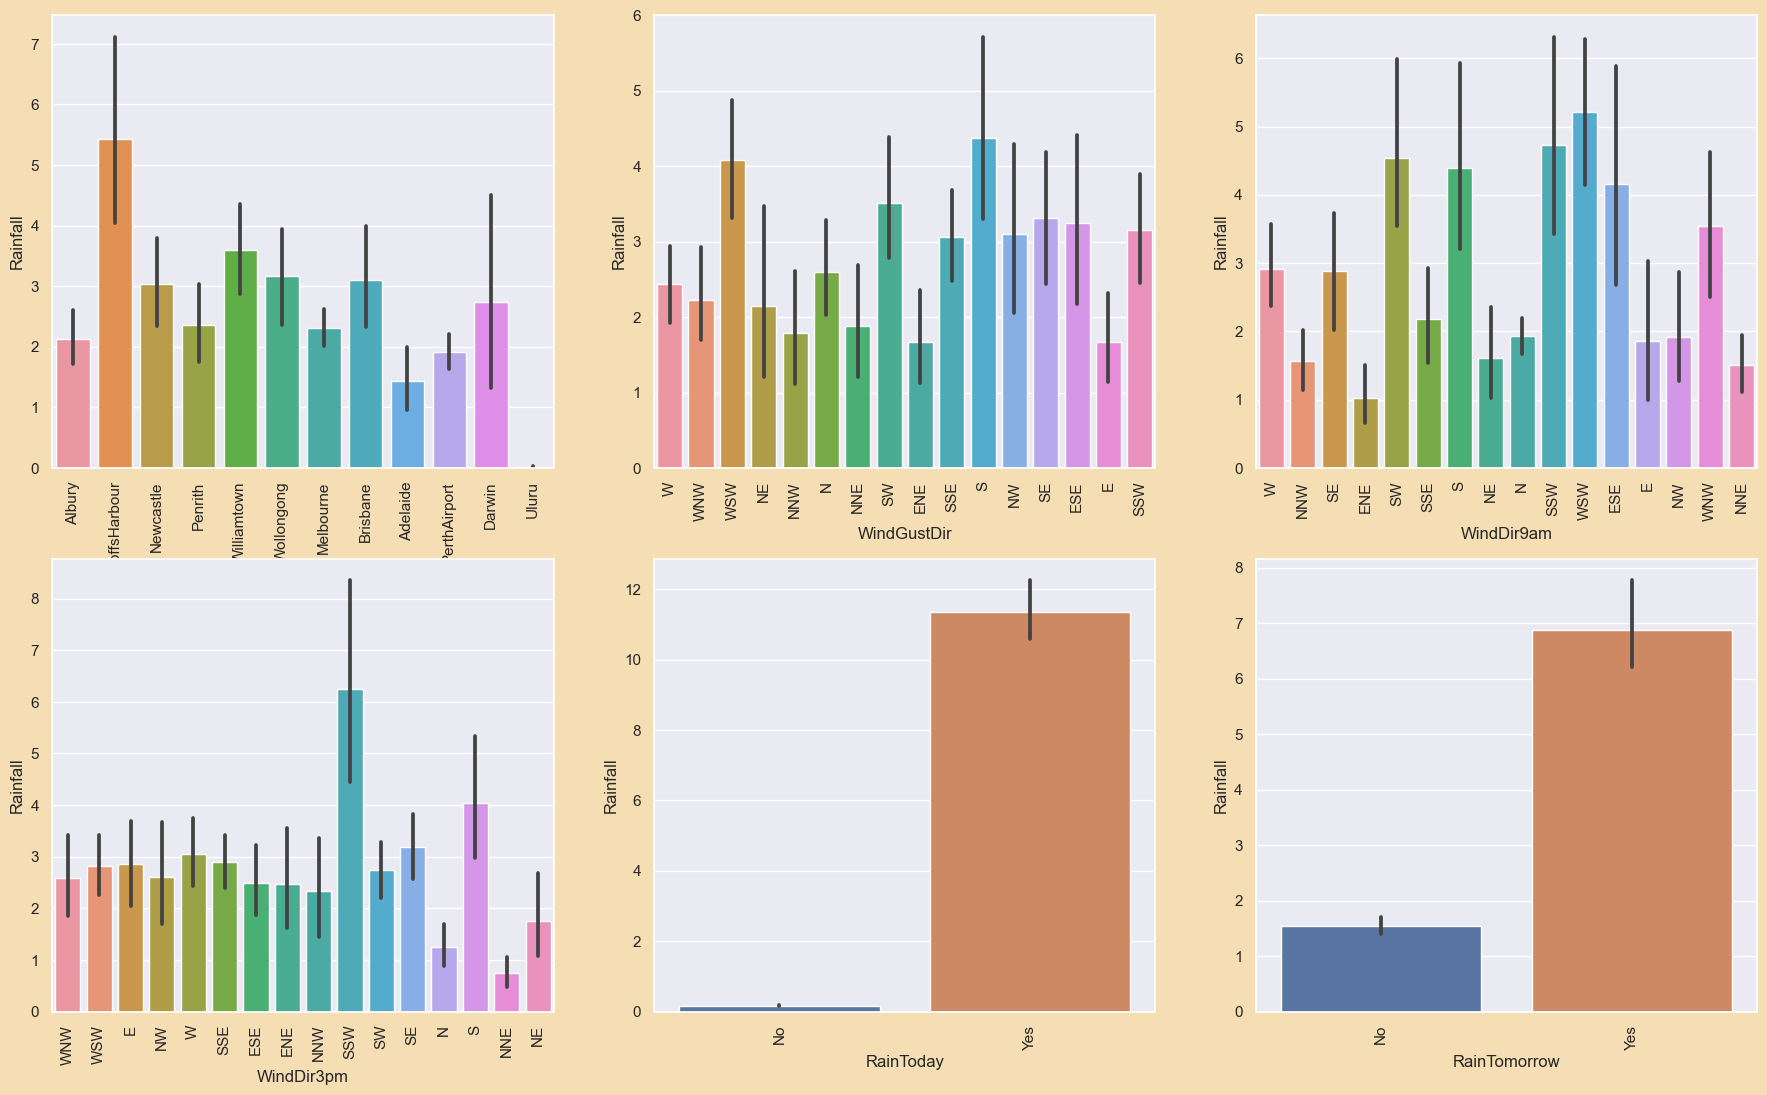

In [37]:


sns.set_style('darkgrid')
sns.set(font_scale=1)
plt.figure(facecolor='wheat',figsize=(22,20))
p=1
for i in categorical_col:
    if p<=9:
        ax=plt.subplot(3,3,p)
        sns.barplot(x=df[i],y='Rainfall',data=df),#errorbar=None)
        plt.xticks(rotation=90)
    p+=1



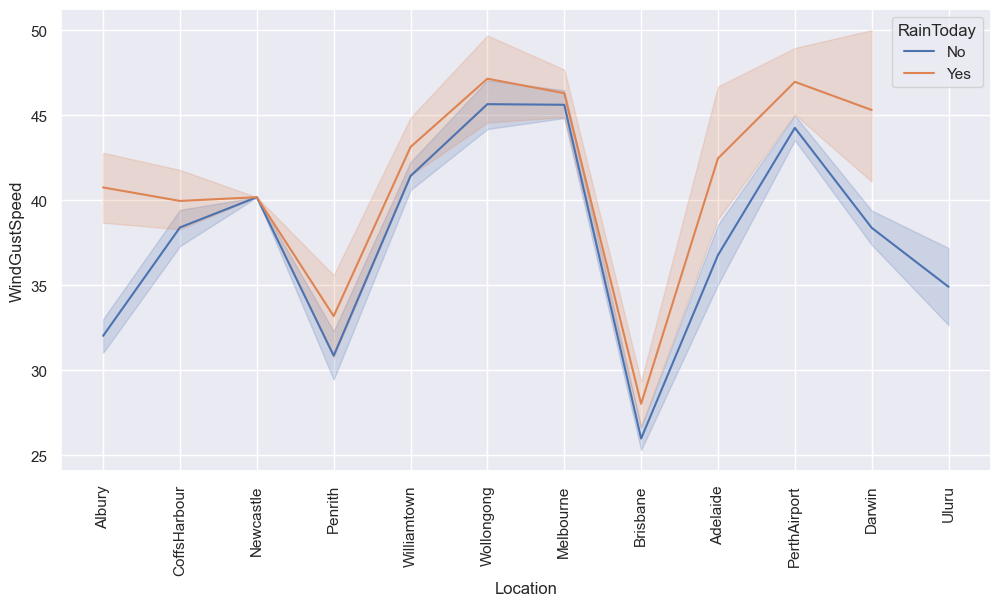

In [38]:
plt.figure(figsize =[12,6])
sns.lineplot(x='Location', y='WindGustSpeed',data = df, hue = 'RainToday')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

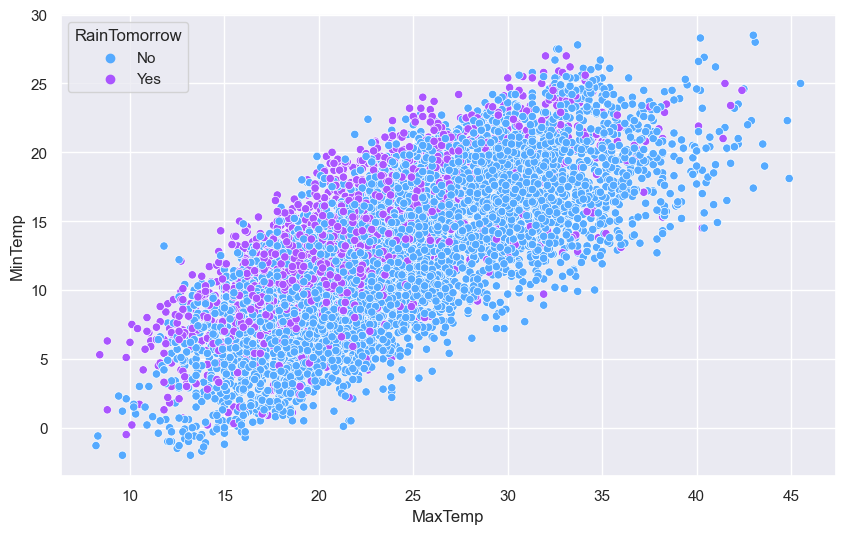

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',palette='cool',data=df)



As the Min temp is increasing Max Temp is also increasing, it is a linear relationship .


<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

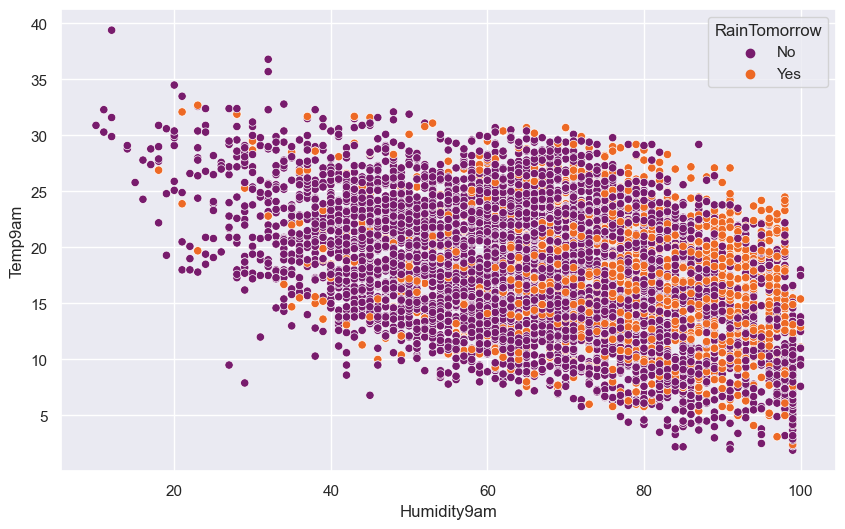

In [43]:


plt.figure(figsize=(10,6))
sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',palette='inferno',data=df)
     





Linear relationship is seen between temperature and humidity


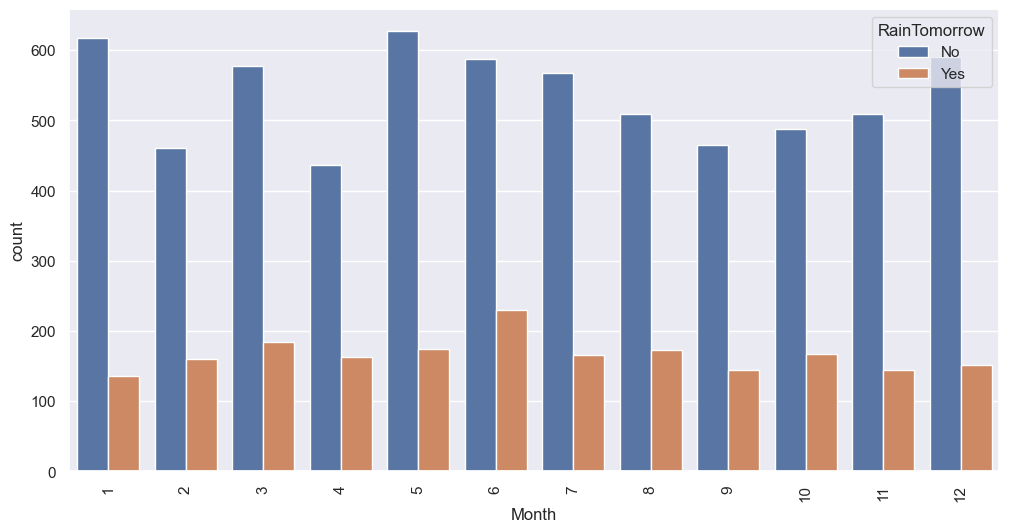

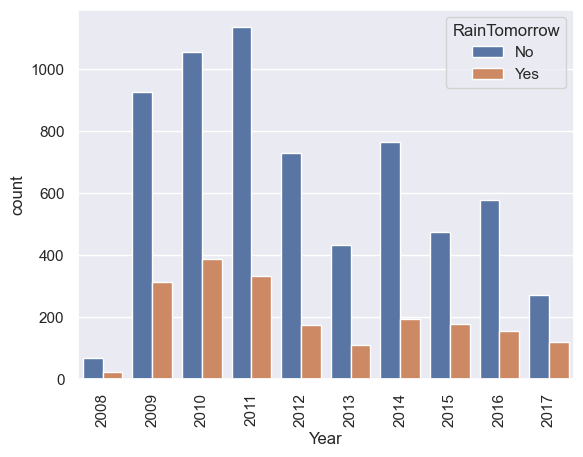

In [45]:


duration= ['Month','Year']
plt.figure(figsize =[12,6])
for i in duration:
    sns.countplot(x=df[i], hue = df['RainTomorrow'])
    plt.xticks(rotation = 90)
    plt.show()



most of the rainfall for next day of observation occured during the month of June.

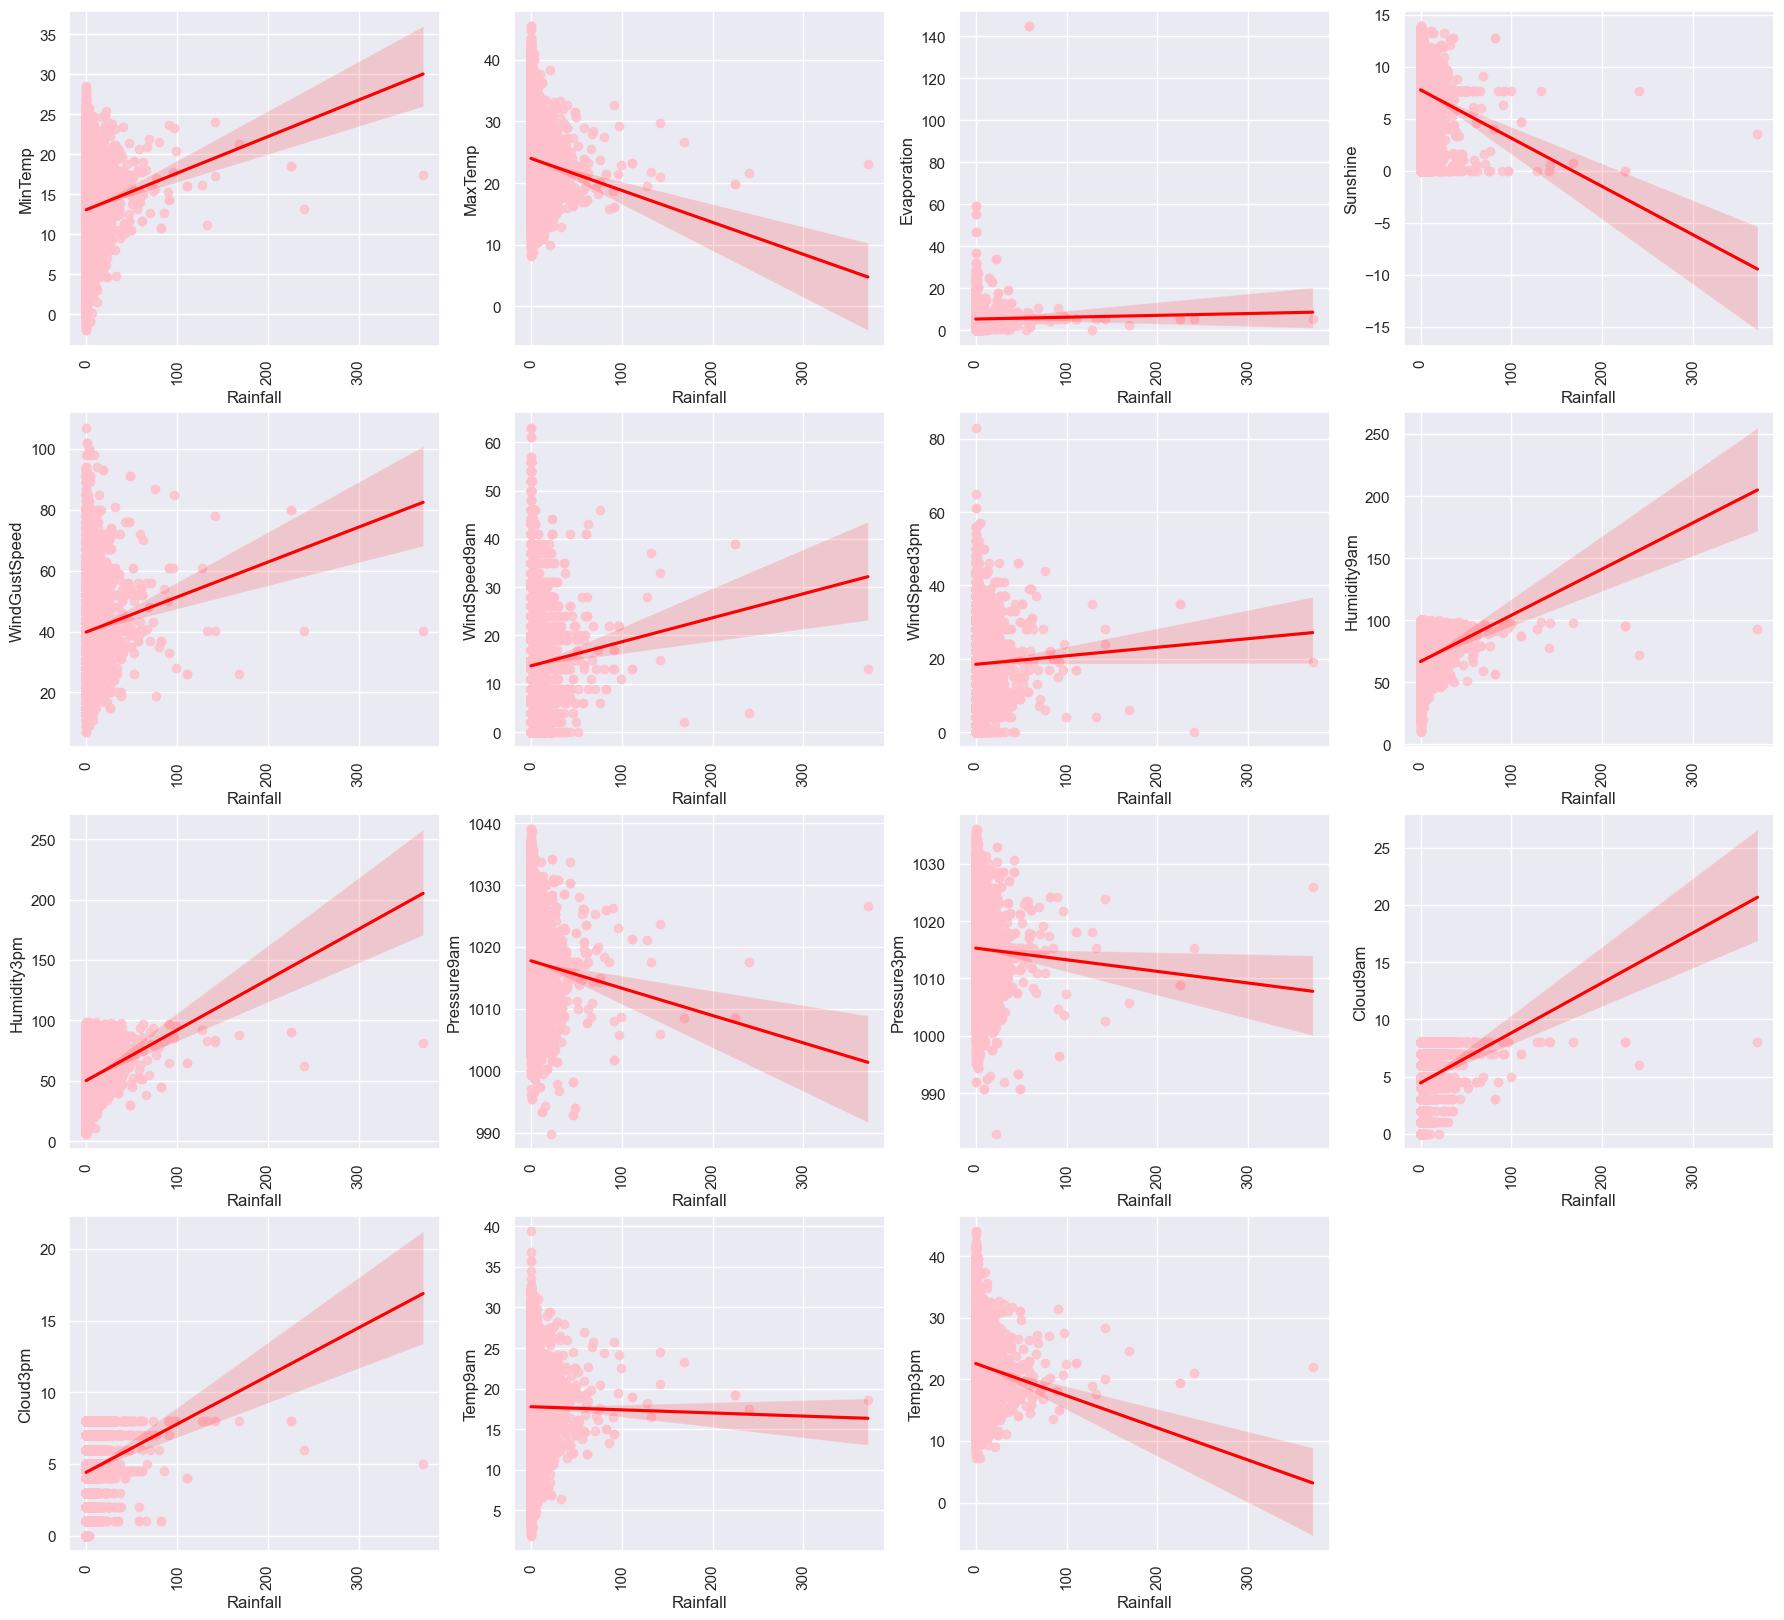

In [46]:


plt.figure(figsize=(22,20))
p=1
for i in numerical_col:
    if p<=16:
        if i=='Rainfall':
            continue
        ax=plt.subplot(4,4,p)
        sns.regplot(y=df[i],x='Rainfall',color='pink',data=df,line_kws=dict(color='red'))
        plt.xticks(rotation=90)
    p+=1



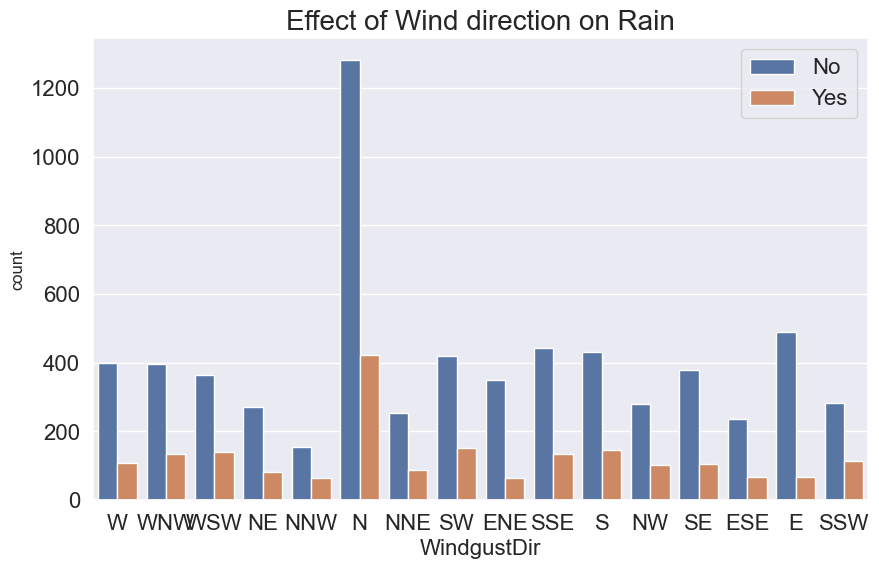

In [48]:


plt.figure(figsize=(10,6))
p = sns.countplot(x=df['WindGustDir'], hue=df['RainTomorrow'])
plt.title('Effect of Wind direction on Rain', fontsize=20)
p.set_xlabel('WindgustDir',fontsize=16)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()



Maximum rainfall can be seen in the areas where the direction of strongest wind gust is in North direction in a day

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

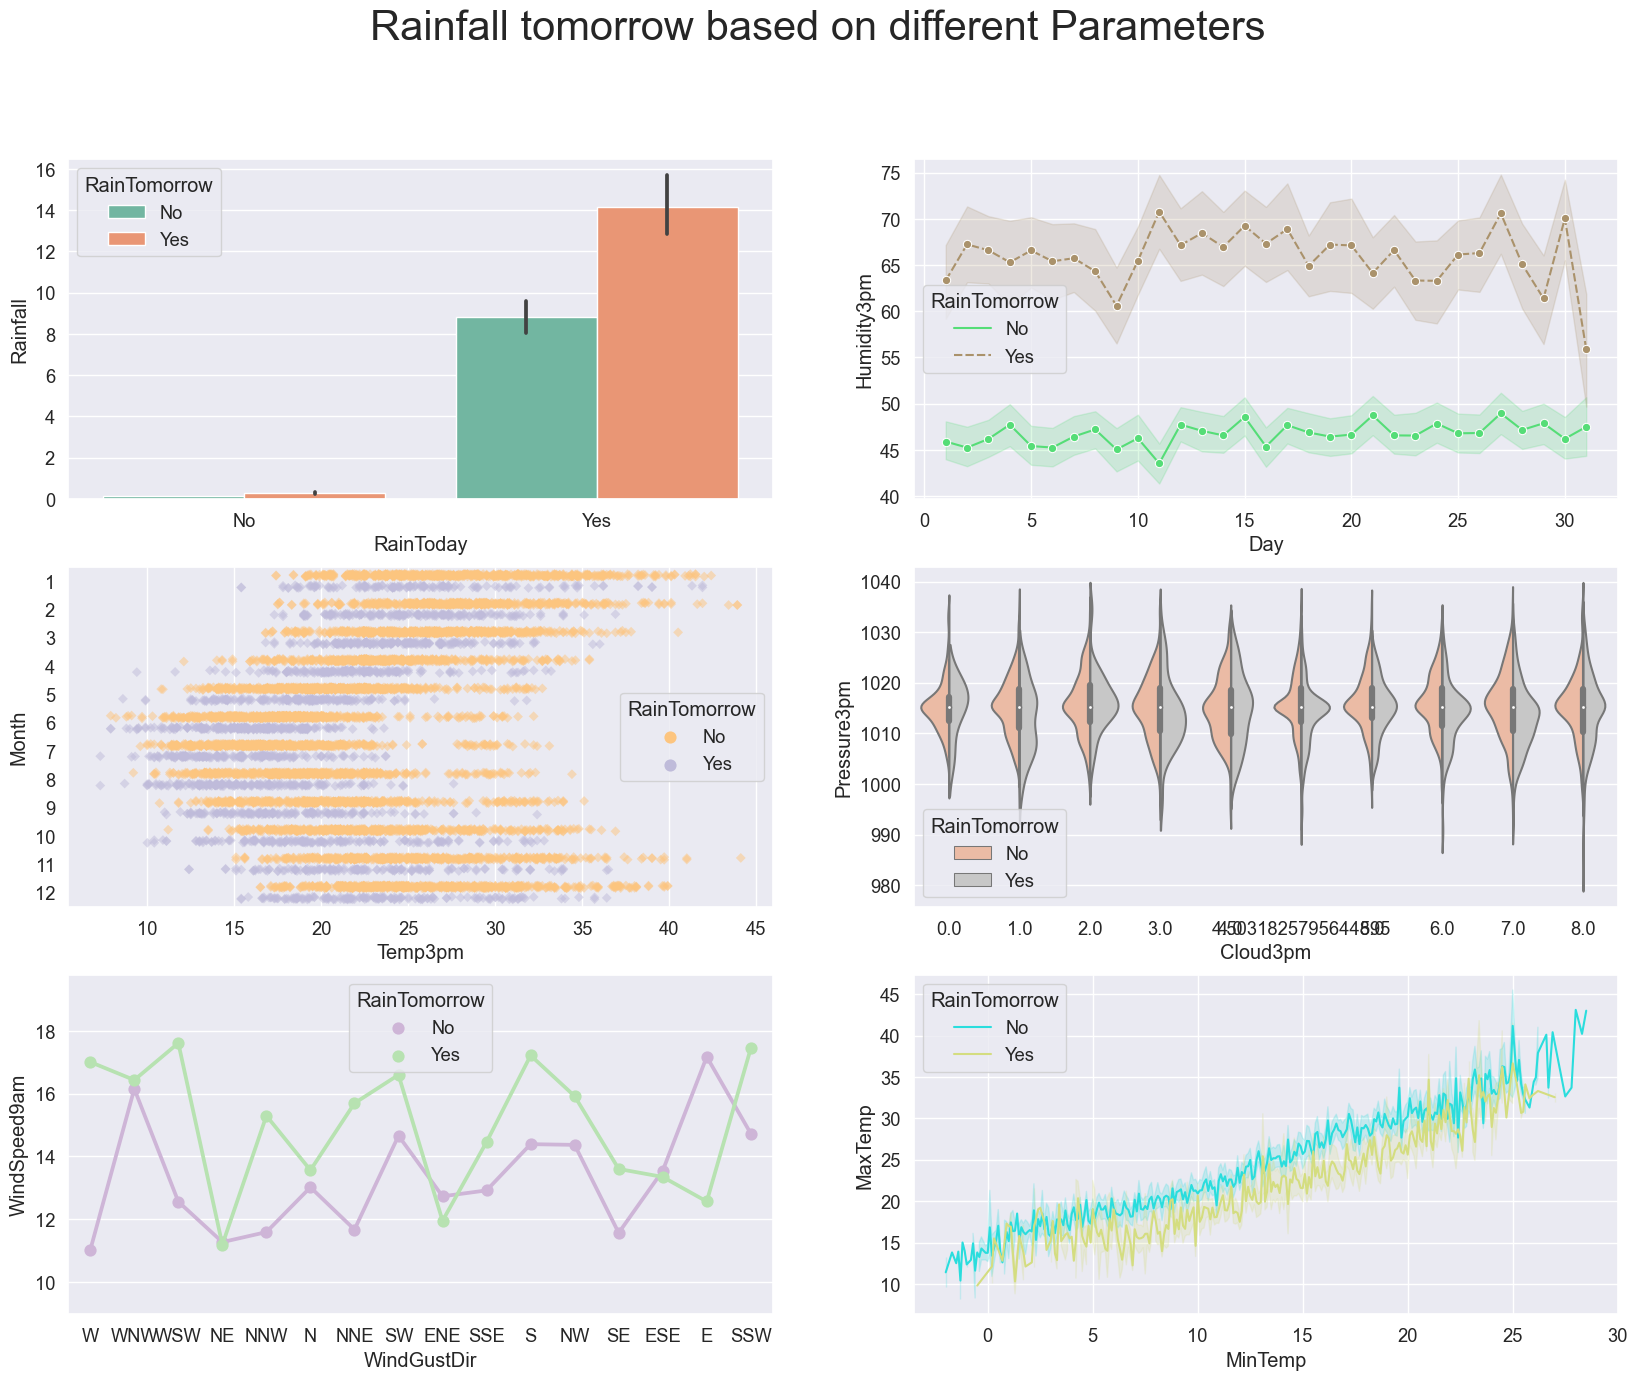

In [49]:
sns.set(font_scale=1.2)
fig,axes = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Rainfall tomorrow based on different Parameters',fontsize=30) 
sns.barplot(ax=axes[0, 0],x='RainToday',y='Rainfall',hue='RainTomorrow',data=df,palette="Set2") 
sns.lineplot(ax=axes[0, 1],x='Day',y='Humidity3pm',hue='RainTomorrow',style='RainTomorrow',marker='o',
             data=df,palette="terrain")
sns.stripplot(ax=axes[1, 0],y='Month',x='Temp3pm',hue='RainTomorrow',data=df,palette="PuOr",orient='h',marker='D',
              alpha=.5,dodge=True)
sns.violinplot(ax=axes[1, 1],x='Cloud3pm',y='Pressure3pm',hue='RainTomorrow',data=df,palette="RdGy",split=True)
sns.pointplot(ax=axes[2, 0],y='WindSpeed9am',x='WindGustDir',hue='RainTomorrow',data=df,palette="PRGn",errwidth=0)
sns.lineplot(ax=axes[2, 1],x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=df,palette='rainbow')



Whenever it rains today, there is a high probability of raining tomorrow as well. Rain tomorrow is directly related to 
temperature at 3pm as chance of raining tomorrow increases as the temperature increases.Rain tomorrow generally happens 
when there is a humidity of more than 55 units recorded at 3pm. Pressure at 3pm mostly ranges around 1000-1300 units Cances
of rain tomorrow increases whenever there is more wind speed, whatever be the wind direction.


In [50]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))


In [51]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [52]:


df.head() 



Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1  8.000000   
1           44.0           6          15  ...       1007.8  4.566622   
2           46.0          13          15  ...       1008.7  4.566622   
3           24.0           9           0  ...       1012.8  4.566622   
4           41.0           1           7  ...       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0  4.503183     16.9     21.8          0             0    1     12  2008  
1  4.503183     17.2     24.3          0             0    2     12  2008  
2  2.000000     21.0     23.2          0             0    3     12  2008  
3  4.503183     18.1     26.5          0             0    4     12  2008  
4  8.000000     17.8     29.7          0             0    5     12  2008  

[5 rows x 25 columns]

<AxesSubplot:>

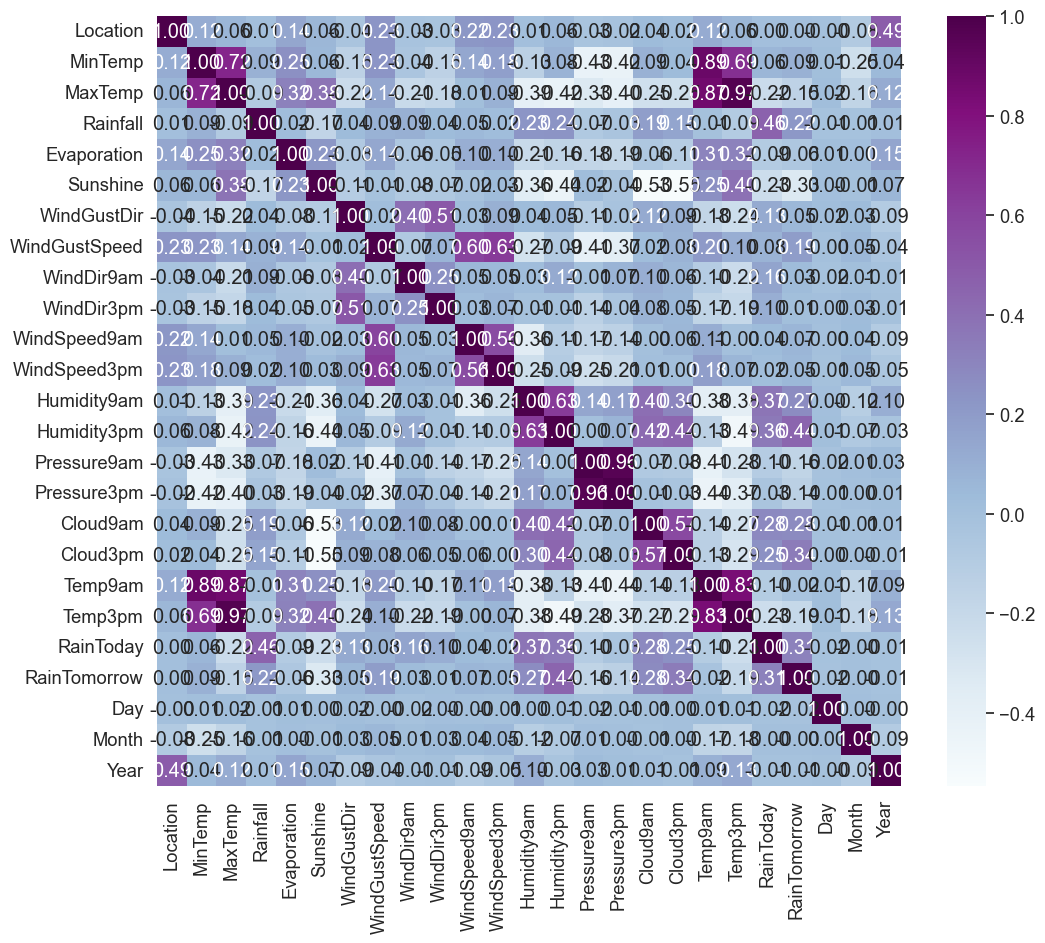

In [53]:


#Plotting the correlation of columns
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(),annot = True, fmt = '0.2f',cmap='BuPu')



Humidity3pm      0.444808
Cloud3pm         0.344369
RainToday        0.312929
Cloud9am         0.278943
Humidity9am      0.271222
Rainfall         0.220021
WindGustSpeed    0.190127
MinTemp          0.092942
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Month           -0.001243
Year            -0.011066
Day             -0.015461
Temp9am         -0.023211
Evaporation     -0.059012
Pressure3pm     -0.135242
MaxTemp         -0.152886
Pressure9am     -0.163985
Temp3pm         -0.193805
Sunshine        -0.327731
Name: RainTomorrow, dtype: float64


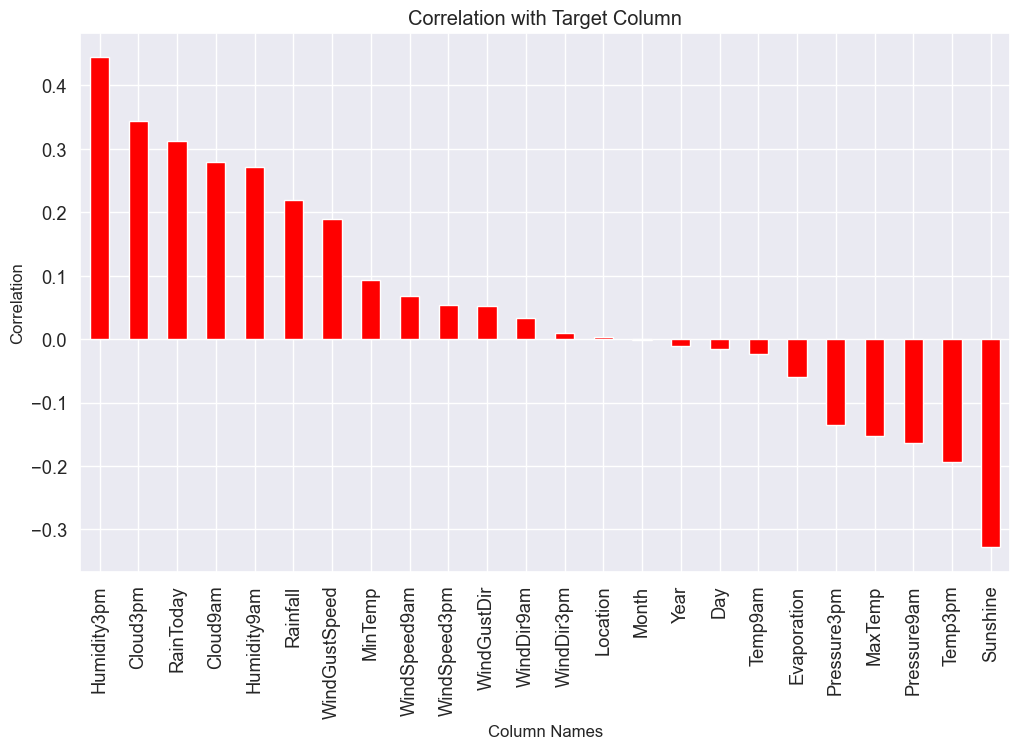

In [54]:


#Considering 'RainTomorrow' as Target Variable
print(df.corr()['RainTomorrow'].drop('RainTomorrow').sort_values(ascending = False))
plt.figure(figsize = [12,7])
df.corr()['RainTomorrow'].sort_values(ascending= False).drop('RainTomorrow').plot(kind = 'bar', color ='red')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()





The columns 'Month', 'Year', 'Day', 'Temp9am', 'Evaporation', 'Pressure3pm', 'MaxTemp', 'Pressure9am', 'Temp3pm' and 
'Sunshine'(Highest) are having negative correlation to the target variable 'RainTomorrow'. Rest of the columns are having 
positive correlation to the target variable 'RainTomorrow'.


RainToday        0.461106
Humidity3pm      0.235444
Humidity9am      0.228800
RainTomorrow     0.220021
Cloud9am         0.185444
Cloud3pm         0.150760
WindDir9am       0.093821
MinTemp          0.087684
WindGustSpeed    0.086000
WindSpeed9am     0.050631
WindGustDir      0.038812
WindDir3pm       0.038560
WindSpeed3pm     0.024791
Evaporation      0.023517
Location         0.007693
Year             0.006435
Temp9am         -0.007083
Month           -0.012244
Day             -0.013760
Pressure3pm     -0.033649
Pressure9am     -0.072668
MaxTemp         -0.087451
Temp3pm         -0.090687
Sunshine        -0.169432
Name: Rainfall, dtype: float64


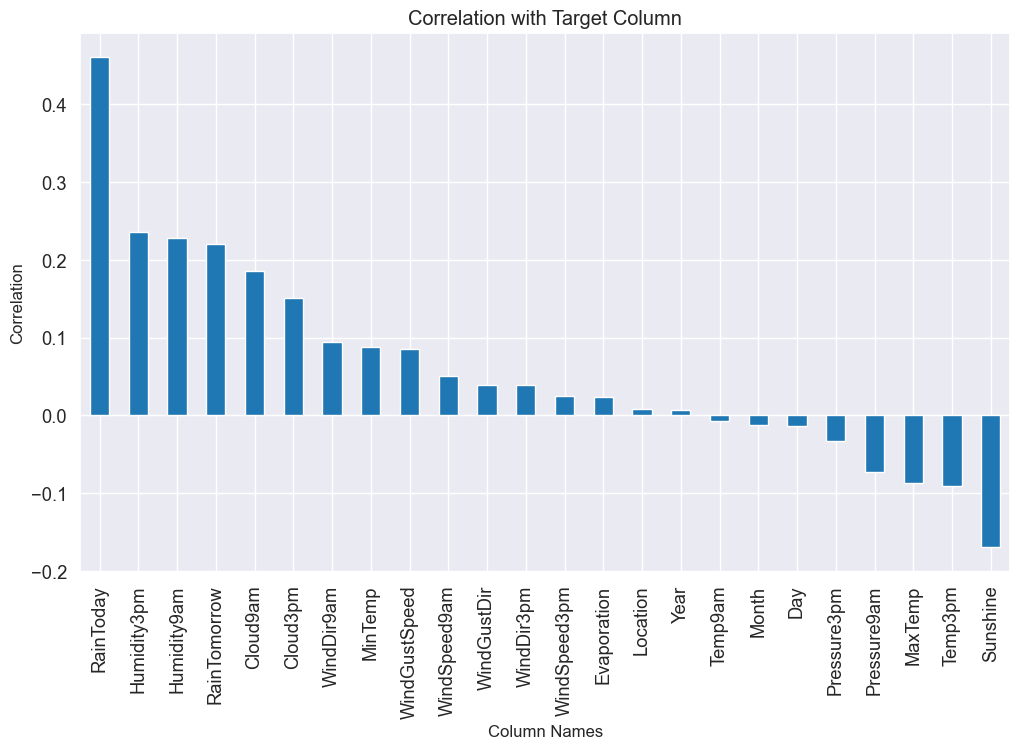

In [55]:


#Considering 'Rainfall' as the Target Variable.
print(df.corr()['Rainfall'].drop('Rainfall').sort_values(ascending = False))
plt.figure(figsize = [12,7])
df.corr()['Rainfall'].sort_values(ascending= False).drop('Rainfall').plot(kind = 'bar', color ='tab:blue')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()



We will be removing the location, month,day and year column as they have negligible correlation with RainTomorrow and 
rainfall

In [56]:


df.drop(['Location','Day','Month','Year'],axis=1,inplace=True)



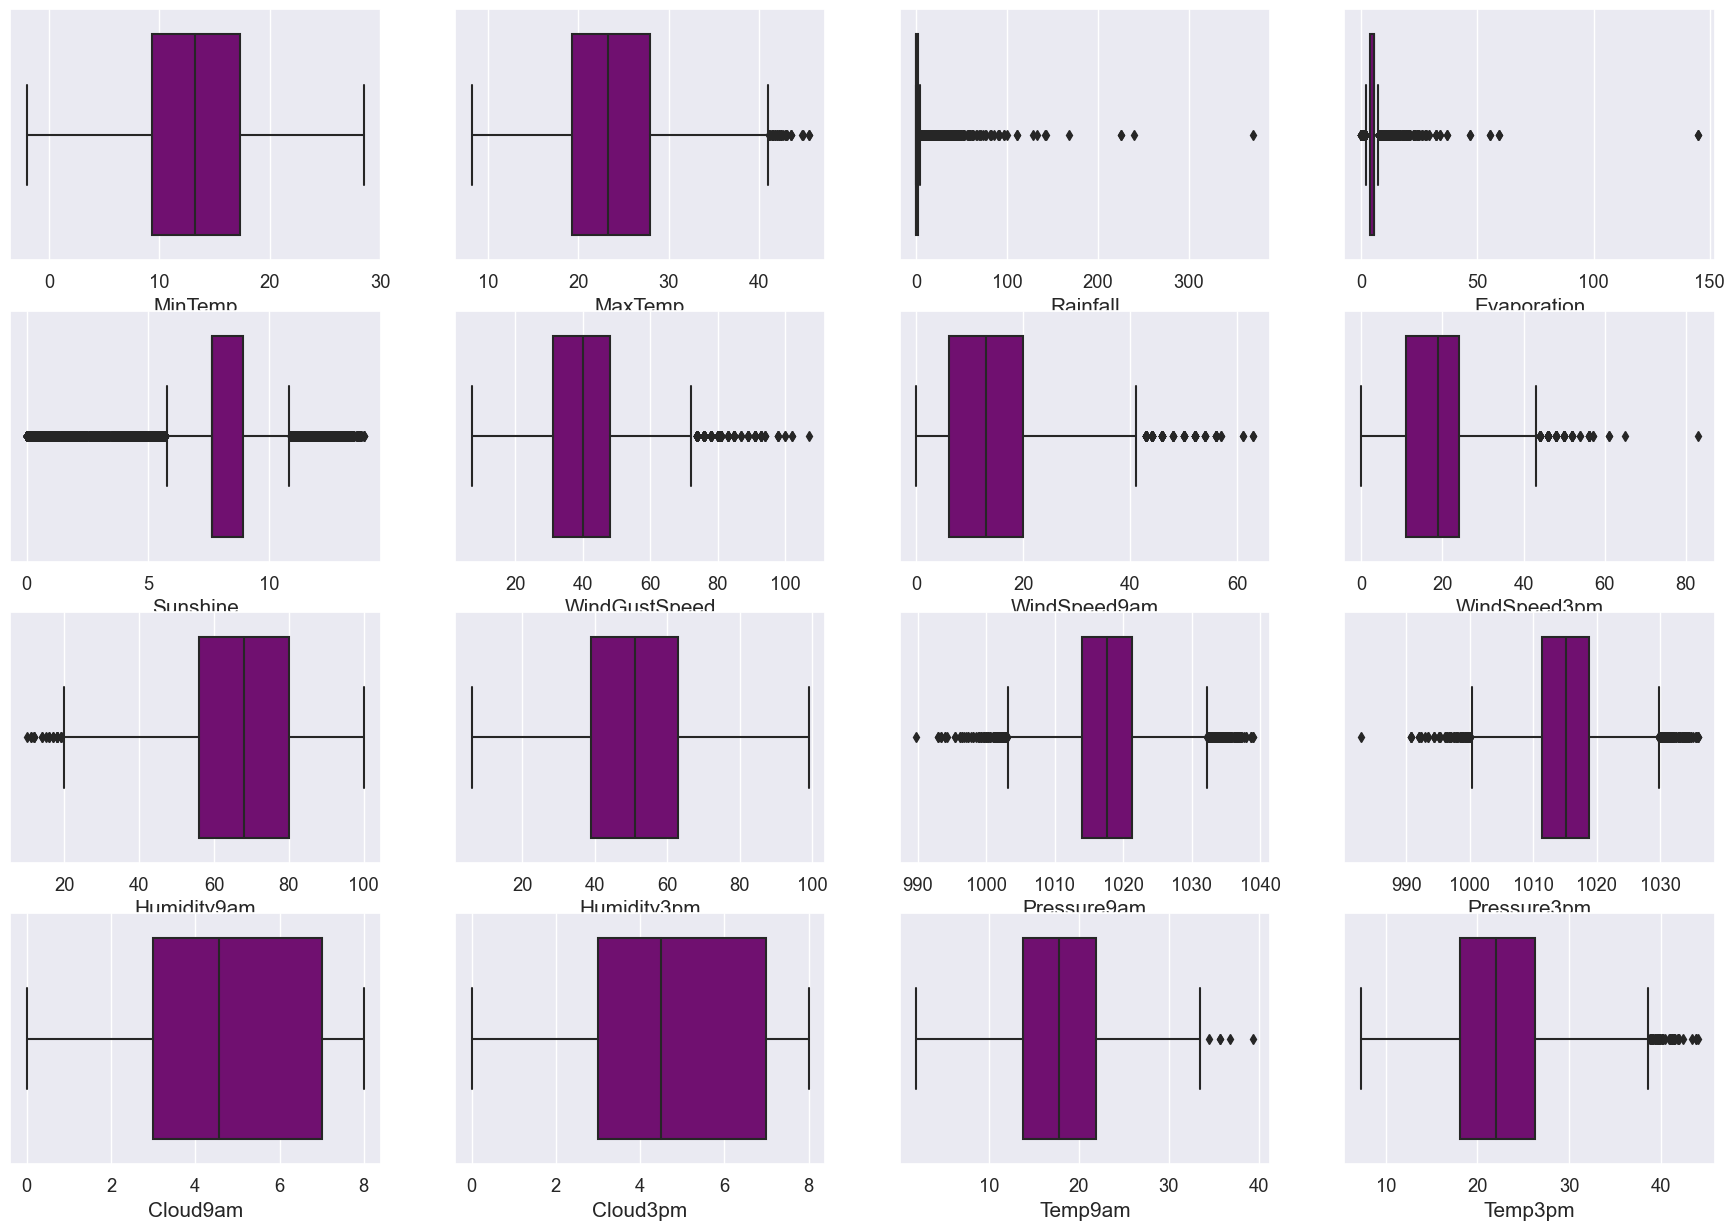

In [57]:


plt.figure(figsize=(22,15))
p=1
for i in numerical_col:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i],color='purple')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()



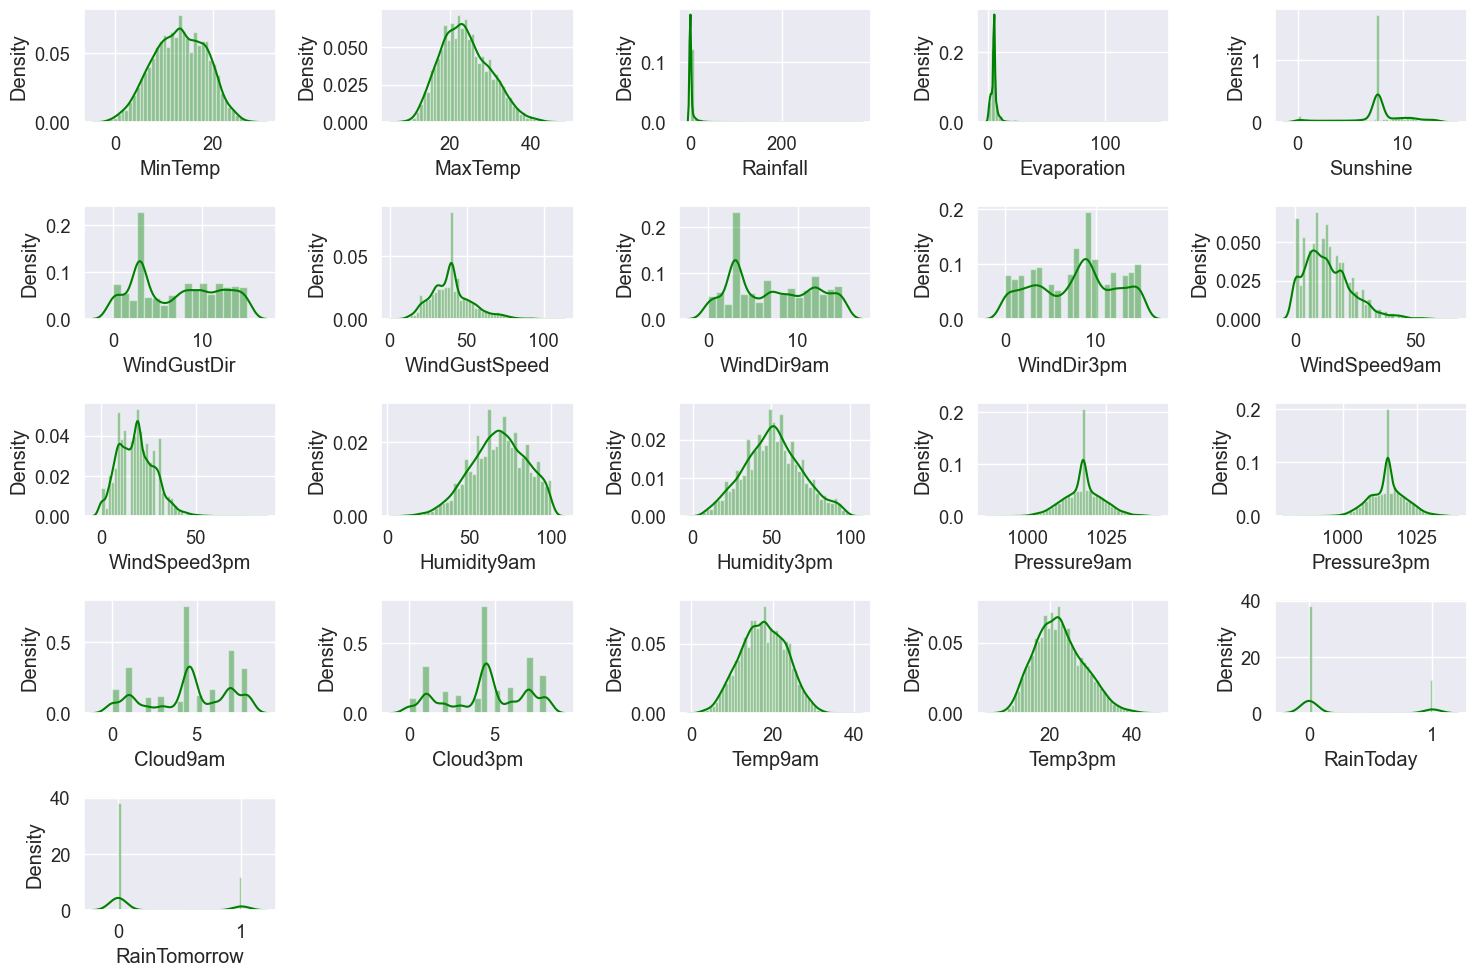

In [58]:


plt.figure(figsize=(15,10))
plot=1
for col in df.columns:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.distplot(df[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()



Skewness is present in most of the variable data.Rainfall and evaporation is extremely skewed to right.

In [59]:
df.skew().sort_values(ascending=False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
RainTomorrow      1.241588
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
MaxTemp           0.380654
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
MinTemp          -0.089989
WindDir3pm       -0.119847
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

The columns 'Evaporation', 'Rainfall', 'RainToday', 'RainTomorrow', 'WindSpeed9am','WindGustSpeed'and 'Sunshine' are
having high skewness in the data distribution. The columns 'RainToday' and 'RainTomorrow' are categorical in nature. So the
skewness of these columns are 
irrelevant.



DATA CLEANING - (REMOVING SKEWNESS FROM THE DATA )


(8425, 20)
(8425,)
0    6434
1    1991
Name: RainTomorrow, dtype: int64


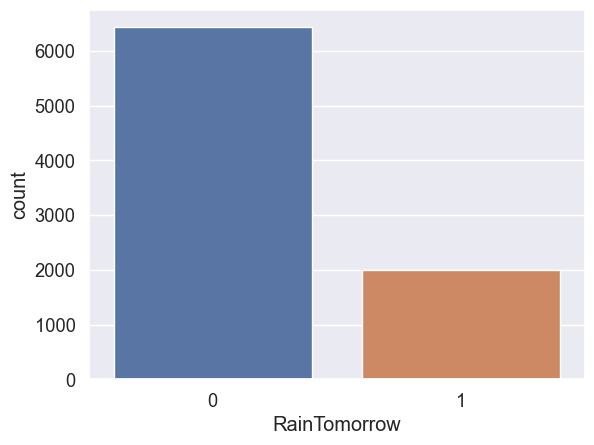

In [60]:
#1) PREDICTING 'RAIN TOMORROW' AS TARGET VARIABLE 
#Splitting the data into 'x' and 'y' labels-

x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

print(x.shape)
print(y.shape)
z = x.columns
sns.countplot(x=y)
print(y.value_counts())

The data is not balanced. There is extreme imbalance present in the data. So we can balance the data using SMOTE technique .

0    6434
1    6434
Name: RainTomorrow, dtype: int64


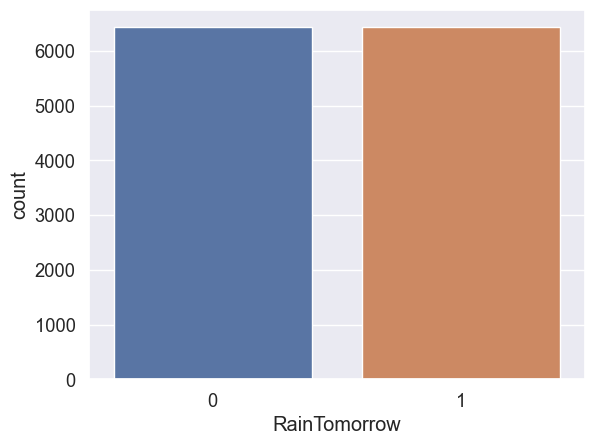

In [61]:


from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y=sm.fit_resample(x,y)
sns.countplot(x=y)
print(y.value_counts())



In [62]:


z = x.columns
print(x.shape)
print(y.shape)



(12868, 20)
(12868,)


In [63]:


#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = z)
x



MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     -0.022206 -0.062928 -0.266618     0.051141  0.195360     1.283191   
1     -1.168126  0.308285 -0.312237     0.051141  0.195360     1.505140   
2     -0.117700  0.409525 -0.312237     0.051141  0.195360     1.727088   
3     -0.824350  0.797612 -0.312237     0.051141  0.195360    -0.714348   
4      0.760839  1.523165 -0.236205     0.051141  0.195360     1.283191   
...         ...       ...       ...          ...       ...          ...   
12863 -0.511627  0.585931 -0.305172     0.051141  0.195360     1.505140   
12864 -0.323151 -0.649035 -0.283684    -0.718095 -0.232645    -0.714348   
12865  1.265978  0.438103  0.236749     0.051141  0.195360    -0.714348   
12866  0.112542 -0.390396 -0.101610     1.531166  0.875574     1.505140   
12867  0.886637  0.524330 -0.218028     0.051141  0.195360    -0.936297   

       WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           0.161916    1.302811    1.483906      0.575217      0.526879   
1           0.161916   -0.277517    1.719199     -1.021023      0.323249   
2           0.302043    1.302811    1.719199      0.475452      0.730509   
3          -1.239355    0.399766   -1.810185     -0.322668     -1.000347   
4          -0.048274   -1.406323   -0.163139     -0.721728      0.119619   
...              ...         ...         ...           ...           ...   
12863       1.015414    0.625527   -0.869016     -0.401267      0.512479   
12864       0.928332   -0.954800   -0.869016      1.438470      1.096200   
12865      -1.162137    0.851289   -0.163139     -0.931446     -0.817511   
12866       1.913506    1.302811    1.719199      1.014920      1.867454   
12867      -0.106114   -0.954800   -0.163139     -1.420083     -1.783886   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         0.015482    -1.791324    -1.504609    -1.239501  1.299825 -0.219477   
1        -1.618442    -1.635171    -1.038652    -1.126361 -0.178775 -0.219477   
2        -1.981536    -1.374915    -1.520676    -0.980896 -0.178775 -1.353765   
3        -1.557926    -2.103631     0.086072    -0.318220 -0.178775 -0.219477   
4         0.681154    -1.218761    -1.006517    -1.417292  0.869170  1.365065   
...            ...          ...          ...          ...       ...       ...   
12863     0.703153    -1.315502    -0.010821    -0.775843  0.508242 -1.175264   
12864    -0.650191    -0.104436     0.116908    -0.248596 -0.273297  0.671504   
12865     1.204807     1.019438     0.092537     0.075519 -0.178775 -0.219477   
12866    -1.244139    -1.008634    -1.218964    -0.969825 -0.079860  0.635023   
12867     1.509959     0.276017     0.092537     0.075519  1.299825  1.365065   

        Temp9am   Temp3pm  RainToday  
0     -0.145116  0.012664  -0.620481  
1     -0.089871  0.444474  -0.620481  
2      0.609897  0.254478  -0.620481  
3      0.075863  0.824466  -0.620481  
4      0.020618  1.377182  -0.620481  
...         ...       ...        ...  
12863 -0.237740  0.771256  -0.620481  
12864 -0.559289 -0.507278  -0.620481  
12865  0.750830  0.413457   1.611654  
12866 -0.070096 -0.233624  -0.620481  
12867  0.389319  0.734342  -0.620481  

[12868 rows x 20 columns]

In [64]:


#We can set the skewness standard limit as +/-0.5.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]



Evaporation      13.460652
Rainfall         10.193910
RainToday         0.991289
WindSpeed9am      0.891604
WindGustSpeed     0.688906
Cloud3pm         -0.511810
Cloud9am         -0.555943
Sunshine         -0.628529
dtype: float64

In [65]:
from sklearn.preprocessing import power_transform
skewed = ['Evaporation','Rainfall','RainToday','WindSpeed9am','WindGustSpeed','Cloud3pm','Cloud9am','Sunshine']
for col in skewed:
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [66]:


x.skew().sort_values(ascending=False)



RainToday        0.991289
Rainfall         0.965218
Temp3pm          0.452553
MaxTemp          0.426102
WindSpeed3pm     0.413783
WindDir9am       0.183325
Sunshine         0.146477
WindGustDir      0.122027
WindSpeed9am     0.064109
Temp9am          0.004695
WindGustSpeed   -0.011025
Pressure3pm     -0.041818
Humidity3pm     -0.045846
Pressure9am     -0.057995
Evaporation     -0.076342
Cloud3pm        -0.081271
Cloud9am        -0.092379
WindDir3pm      -0.110198
MinTemp         -0.125360
Humidity9am     -0.409451
dtype: float64

In [67]:


from scipy.stats import zscore
# Removing outliers using zscore and keeping threshold as 3 .
z_score = np.abs(zscore(x))
df = x[(z_score < 3).all(axis = 1)]
df['RainTomorrow'] = y
df.head()



MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 -0.022206 -0.062928 -0.337718     0.282926  0.091312     1.283191   
1 -1.168126  0.308285 -0.744848     0.282926  0.091312     1.505140   
2 -0.117700  0.409525 -0.744848     0.282926  0.091312     1.727088   
3 -0.824350  0.797612 -0.744848     0.282926  0.091312    -0.714348   
4  0.760839  1.523165 -0.098122     0.282926  0.091312     1.283191   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0       0.291037    1.302811    1.483906      0.714752  ...     0.015482   
1       0.291037   -0.277517    1.719199     -1.139512  ...    -1.618442   
2       0.424746    1.302811    1.719199      0.629867  ...    -1.981536   
3      -1.388594    0.399766   -1.810185     -0.187911  ...    -1.557926   
4       0.078665   -1.406323   -0.163139     -0.707103  ...     0.681154   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0    -1.791324    -1.504609    -1.239501  1.500825 -0.351873 -0.145116   
1    -1.635171    -1.038652    -1.126361 -0.334955 -0.351873 -0.089871   
2    -1.374915    -1.520676    -0.980896 -0.334955 -1.294637  0.609897   
3    -2.103631     0.086072    -0.318220 -0.334955 -0.351873  0.075863   
4    -1.218761    -1.006517    -1.417292  0.888692  1.556371  0.020618   

    Temp3pm  RainToday  RainTomorrow  
0  0.012664  -0.620481             0  
1  0.444474  -0.620481             0  
2  0.254478  -0.620481             0  
3  0.824466  -0.620481             0  
4  1.377182  -0.620481             0  

[5 rows x 21 columns]

In [68]:


df.shape



(12519, 21)

In [69]:


x.shape



(12868, 20)

In [70]:


data_loss = (x.shape[0]-df.shape[0])/x.shape[0]*100
data_loss



2.712154180913895

In [71]:


#x = df.drop('RainTomorrow',axis = 1)
print(x.shape)
print(y.shape)



(12868, 20)
(12868,)


In [72]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))
vif(x)



Column Name  VIF Factor
18        Temp3pm   32.579339
1         MaxTemp   24.577260
13    Pressure9am   20.025295
14    Pressure3pm   18.862341
17        Temp9am   18.601653
0         MinTemp    8.701406
12    Humidity3pm    6.319714
11    Humidity9am    4.288559
2        Rainfall    4.241867
19      RainToday    3.733705
6   WindGustSpeed    2.329127
10   WindSpeed3pm    2.095333
9    WindSpeed9am    2.056404
15       Cloud9am    2.036670
16       Cloud3pm    1.960289
4        Sunshine    1.941007
5     WindGustDir    1.553117
8      WindDir3pm    1.479481
3     Evaporation    1.428521
7      WindDir9am    1.379657

In [73]:
X = x.drop(['Temp3pm','Pressure9am','Temp9am','MaxTemp'], axis = 1)
vif(X)

Column Name  VIF Factor
1        Rainfall    4.191652
15      RainToday    3.725900
10    Humidity9am    2.591626
11    Humidity3pm    2.268205
5   WindGustSpeed    2.266520
9    WindSpeed3pm    2.044443
8    WindSpeed9am    1.981178
13       Cloud9am    1.973854
14       Cloud3pm    1.953962
3        Sunshine    1.887220
4     WindGustDir    1.533024
0         MinTemp    1.443029
2     Evaporation    1.397178
7      WindDir3pm    1.382254
12    Pressure3pm    1.344042
6      WindDir9am    1.326767

In [74]:


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_curve,roc_auc_score



In [75]:
def random_st_cls(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = accuracy_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [76]:
def model_fit_cls(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    cv_score = cross_val_score(model,x,y, cv = 5)
    cv_mean = cv_score.mean()
    print(f" Accuracy score is: {accuracy_score(y_test,pred_test)*100:.2f}")
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,pred_test))
    print ('\n','Classification Report:','\n',classification_report(y_test,pred_test))
    print("The cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(y_test,pred_test))
    print(f'\n Difference between accuracy score and cross val score {(accuracy_score(y_test,pred_test)-cv_mean)*100:.2f}')
    print("-"*50)

In [77]:
def model_cls(m):
    m_rs = random_st_cls(m)
    model_fit_cls(m,m_rs)

In [78]:
Model_classify = [LogisticRegression(),RandomForestClassifier(), KNeighborsClassifier(),DecisionTreeClassifier(),
                  GradientBoostingClassifier(),AdaBoostClassifier(),SVC(),
 ExtraTreesClassifier()]

In [79]:


for i in Model_classify:
    model_cls(i)




 LogisticRegression()
At random state  42 the model is having accuracy score of  0.7987567987567987
 Accuracy score is: 79.88

 Confusion matrix: 
 [[1575  377]
 [ 400 1509]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1952
           1       0.80      0.79      0.80      1909

    accuracy                           0.80      3861
   macro avg       0.80      0.80      0.80      3861
weighted avg       0.80      0.80      0.80      3861

The cv score is  0.7622863512097868 and the accuracy score  is  0.7987567987567987

 Difference between accuracy score and cross val score 3.65
--------------------------------------------------

 RandomForestClassifier()
At random state  12 the model is having accuracy score of  0.9352499352499353
 Accuracy score is: 93.21

 Confusion matrix: 
 [[1777  137]
 [ 125 1822]]

 Classification Report: 
               precision    recall  f1-score   support

           0 

Hyper Parameter tuning

In [215]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [100,150,200],
             'criterion': ['gini', 'entropy', 'log_loss'],
             'min_samples_split': [1,2,3],
             'max_features':['sqrt','log2',None]}

grid = GridSearchCV(estimator = ExtraTreesClassifier(),param_grid=parameters, cv = 10)

In [216]:


grid.fit(x,y)



GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]})

In [217]:
grid.best_score_

0.9190535078370722

In [218]:


grid.best_params_



{'criterion': 'gini',
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 200}

In [219]:
final_model_cls= ExtraTreesClassifier(n_estimators = 100,criterion = 'gini',min_samples_split = 2,max_features = 'log2')
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 45)
final_model_cls.fit(x_train, y_train)
pred_etc = final_model_cls.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test,pred_etc))
print(classification_report(y_test,pred_etc))
cv_score = cross_val_score(final_model_cls,x,y, cv = 10)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.9427650141072148
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1227
           1       0.93      0.96      0.94      1254

    accuracy                           0.94      2481
   macro avg       0.94      0.94      0.94      2481
weighted avg       0.94      0.94      0.94      2481

CV score is  0.9172794442567127


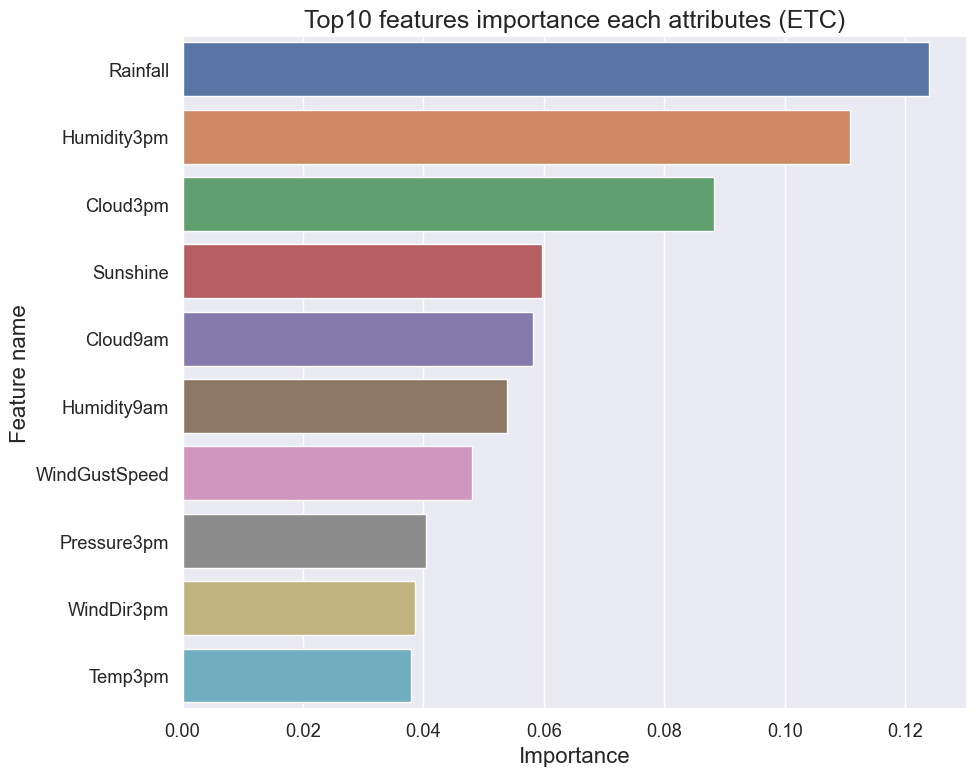

In [220]:
imp_id=pd.DataFrame({"Feature Name":x_train.columns,"Importance":final_model_cls.feature_importances_})
fi=imp_id.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title('Top10 features importance each attributes (ETC)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature name', fontsize=16)
plt.show()

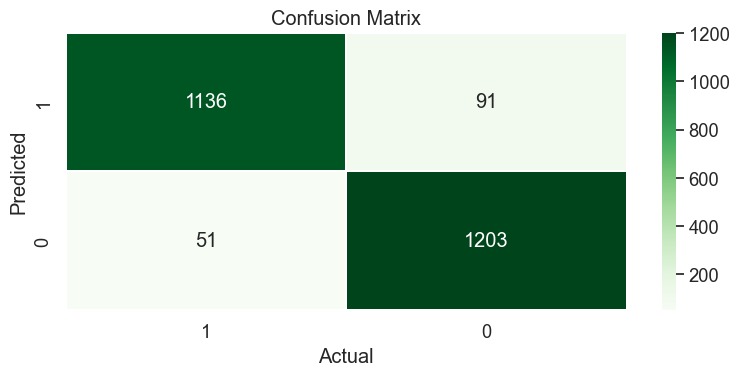

In [221]:
cm = confusion_matrix(y_test, pred_etc)
x_labels = ["1","0"]
y_labels = ["1","0"]
f, ax = plt.subplots(figsize =(8,4))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

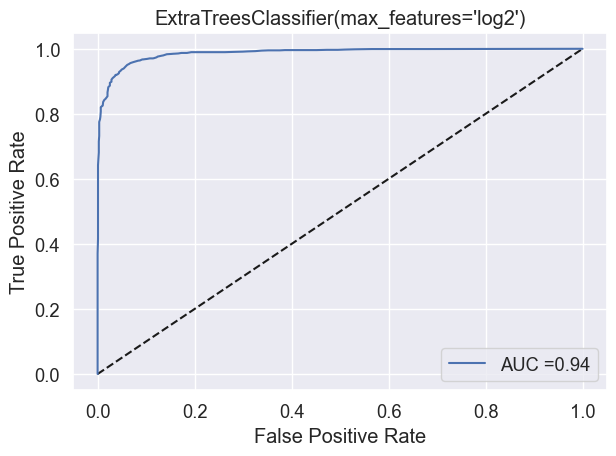

In [222]:
def auc_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = roc_auc_score(y_test, model.predict(x_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()
auc_roc(final_model_cls)

In [223]:
import pickle

filename = 'Rainfall forecasting RainTomorrow model .pkl'
pickle.dump(final_model_cls,open(filename,'wb'))

In [224]:
original = np.array(y_test)
predicted = np.round(np.array(final_model_cls.predict(x_test)),0)
tom_prediction = pd.DataFrame({'Rain Tomorrow(Original)':original,'Rain Tomorrow(Predicted)':predicted})
tom_prediction.sample(10)

Rain Tomorrow(Original)  Rain Tomorrow(Predicted)
442                         1                         1
1750                        1                         1
785                         0                         0
1416                        1                         1
1564                        0                         0
1488                        1                         1
1607                        1                         1
1140                        0                         0
306                         1                         1
1102                        1                         1

PREDICTING 'RAINFALL' AS TARGET VARIABLE-

In [140]:
df=pd.read_csv('weatherAUS.csv')

In [141]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [156]:


#Splitting the data into 'x' and 'y' labels-
X=df.drop('Rainfall',axis=1)
Y=df['Rainfall']
Z = X.columns

print(X.shape)
print(Y.shape)



(8425, 20)
(8425,)


In [158]:


#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns = Z)
X



MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0     0.038254 -0.156449          NaN       NaN     0.822266       0.260866   
1    -1.072185  0.202089          NaN       NaN     1.015602       0.260866   
2    -0.054283  0.299872          NaN       NaN     1.208937       0.397248   
3    -0.739053  0.674706          NaN       NaN    -0.917752      -1.102950   
4     0.797053  1.375484          NaN       NaN     0.822266       0.056294   
...        ...       ...          ...       ...          ...            ...   
8420 -1.923520 -0.074963          NaN       NaN    -1.691094      -0.625614   
8421 -1.775462  0.234683          NaN       NaN    -0.531081      -1.239332   
8422 -1.442331  0.495437          NaN       NaN    -1.111088      -0.216470   
8423 -0.998155  0.511734          NaN       NaN     0.048925      -0.830187   
8424  0.315863       NaN          NaN       NaN     1.402273            NaN   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0       0.888498    1.266248      0.604715      0.559709     0.188774   
1      -0.508068    1.479649     -0.967926      0.354925    -1.415287   
2       0.888498    1.479649      0.506425      0.764492    -1.771745   
3       0.090460   -1.721369     -0.279895     -0.976170    -1.355877   
4      -1.505616   -0.227560     -0.673055      0.150141     0.842281   
...          ...         ...           ...           ...          ...   
8420    0.090460   -1.507968     -0.083315     -0.771386    -0.999419   
8421    0.090460   -1.081165     -0.083315     -0.976170    -0.702371   
8422    0.090460    1.266248     -0.476475     -0.976170    -0.880600   
8423    0.289970   -1.081165     -0.083315     -1.180953    -0.999419   
8424   -1.306106   -1.294566      0.309845     -0.157035    -0.345913   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.587707    -1.455758    -1.202458  1.193214       NaN -0.153201   
1       -1.424864    -1.031050    -1.099002       NaN       NaN -0.099884   
2       -1.153459    -1.470403    -0.965988       NaN -0.916437  0.575468   
3       -1.913392    -0.005892    -0.360036       NaN       NaN  0.060068   
4       -0.990616    -1.001759    -1.365030  0.845681  1.280215  0.006751   
...           ...          ...          ...       ...       ...       ...   
8420    -1.479145     1.019265     0.748414       NaN       NaN -1.361725   
8421    -1.641988     0.858169     0.571062       NaN       NaN -1.219545   
8422    -1.479145     0.492041     0.231138       NaN       NaN -0.935187   
8423    -1.479145     0.257720     0.186800 -0.544454 -0.916437 -0.473104   
8424    -0.827773     0.374881     0.393710  1.193214  1.280215 -0.490877   

       Temp3pm  RainToday  RainTomorrow  
0    -0.107520  -0.570379     -0.570457  
1     0.310564  -0.570379     -0.570457  
2     0.126607  -0.570379     -0.570457  
3     0.678477  -0.570379     -0.570457  
4     1.213625  -0.570379     -0.570457  
...        ...        ...           ...  
8420 -0.007180  -0.570379     -0.570457  
8421  0.344010  -0.570379     -0.570457  
8422  0.611584  -0.570379     -0.570457  
8423  0.594861  -0.570379     -0.570457  
8424 -0.258030  -0.570379      3.322699  

[8425 rows x 20 columns]

In [159]:


#We can set the skewness standard limit as +/-1.
X.skew().sort_values(ascending=False)[np.abs(X.skew())>0.5]



Evaporation      10.710605
RainToday         1.521128
RainTomorrow      1.520255
WindSpeed9am      0.956250
WindGustSpeed     0.711103
Sunshine         -0.519717
dtype: float64

In [161]:
skew_col= ['Evaporation','RainToday','WindSpeed9am','WindGustSpeed','Cloud3pm','Cloud9am','Sunshine']
for col in skew_col:
    X[col]=power_transform((X[col].values.reshape(-1,1)))

In [162]:
X.skew().sort_values(ascending=False)

RainTomorrow     1.520255
RainToday        1.066984
WindSpeed3pm     0.491069
Temp3pm          0.395061
MaxTemp          0.379297
Humidity3pm      0.117563
Evaporation      0.045210
WindSpeed9am     0.022944
Sunshine         0.006279
WindGustSpeed    0.003545
Pressure3pm     -0.009385
Temp9am         -0.014699
Cloud3pm        -0.022101
Pressure9am     -0.022133
Cloud9am        -0.040895
WindDir9am      -0.068691
WindDir3pm      -0.070695
MinTemp         -0.089588
WindGustDir     -0.183350
Humidity9am     -0.255843
dtype: float64

In [178]:


# Removing outliers using zscore and keeping threshold as 3 .
z_score = np.abs(zscore(X))
df2 = X[(z_score < 3).all(axis = 1)]
df2['Rainfall'] = Y
df2


MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0         NaN      NaN          NaN       NaN          NaN            NaN   
1         NaN      NaN          NaN       NaN          NaN            NaN   
2         NaN      NaN          NaN       NaN          NaN            NaN   
3         NaN      NaN          NaN       NaN          NaN            NaN   
4         NaN      NaN          NaN       NaN          NaN            NaN   
...       ...      ...          ...       ...          ...            ...   
8420      NaN      NaN          NaN       NaN          NaN            NaN   
8421      NaN      NaN          NaN       NaN          NaN            NaN   
8422      NaN      NaN          NaN       NaN          NaN            NaN   
8423      NaN      NaN          NaN       NaN          NaN            NaN   
8424      NaN      NaN          NaN       NaN          NaN            NaN   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0            NaN         NaN           NaN           NaN  ...          NaN   
1            NaN         NaN           NaN           NaN  ...          NaN   
2            NaN         NaN           NaN           NaN  ...          NaN   
3            NaN         NaN           NaN           NaN  ...          NaN   
4            NaN         NaN           NaN           NaN  ...          NaN   
...          ...         ...           ...           ...  ...          ...   
8420         NaN         NaN           NaN           NaN  ...          NaN   
8421         NaN         NaN           NaN           NaN  ...          NaN   
8422         NaN         NaN           NaN           NaN  ...          NaN   
8423         NaN         NaN           NaN           NaN  ...          NaN   
8424         NaN         NaN           NaN           NaN  ...          NaN   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0             NaN          NaN       NaN       NaN      NaN      NaN   
1             NaN          NaN       NaN       NaN      NaN      NaN   
2             NaN          NaN       NaN       NaN      NaN      NaN   
3             NaN          NaN       NaN       NaN      NaN      NaN   
4             NaN          NaN       NaN       NaN      NaN      NaN   
...           ...          ...       ...       ...      ...      ...   
8420          NaN          NaN       NaN       NaN      NaN      NaN   
8421          NaN          NaN       NaN       NaN      NaN      NaN   
8422          NaN          NaN       NaN       NaN      NaN      NaN   
8423          NaN          NaN       NaN       NaN      NaN      NaN   
8424          NaN          NaN       NaN       NaN      NaN      NaN   

      RainToday  RainTomorrow  Rainfall  
0           NaN           NaN       0.6  
1           NaN           NaN       0.0  
2           NaN           NaN       0.0  
3           NaN           NaN       0.0  
4           NaN           NaN       1.0  
...         ...           ...       ...  
8420        NaN           NaN       0.0  
8421        NaN           NaN       0.0  
8422        NaN           NaN       0.0  
8423        NaN           NaN       0.0  
8424        NaN           NaN       0.0  

[8425 rows x 21 columns]

In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [150]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           13   
1      7.4     25.1       0.0          NaN       NaN           14   
2     12.9     25.7       0.0          NaN       NaN           15   
3      9.2     28.0       0.0          NaN       NaN            4   
4     17.5     32.3       1.0          NaN       NaN           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          13          14          20.0  ...         71.0   
1           44.0           6          15           4.0  ...         44.0   
2           46.0          13          15          19.0  ...         38.0   
3           24.0           9           0          11.0  ...         45.0   
4           41.0           1           7           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   
3         16.0       1017.6       1012.8       NaN       NaN     18.1   
4         33.0       1010.8       1006.0       7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  
0     21.8          0             0  
1     24.3          0             0  
2     23.2          0             0  
3     26.5          0             0  
4     29.7          0             0  

[5 rows x 21 columns]

In [86]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [147]:
df.drop(['Location'],axis=1,inplace=True)

In [148]:
#Splitting the data into 'x' and 'y' labels-
X=df.drop('Rainfall',axis=1)
Y=df['Rainfall']
Z = X.columns

print(X.shape)
print(Y.shape)

(8425, 20)
(8425,)


In [151]:
X

MinTemp  MaxTemp  Evaporation  Sunshine WindGustDir  WindGustSpeed  \
0        13.4     22.9          NaN       NaN           W           44.0   
1         7.4     25.1          NaN       NaN         WNW           44.0   
2        12.9     25.7          NaN       NaN         WSW           46.0   
3         9.2     28.0          NaN       NaN          NE           24.0   
4        17.5     32.3          NaN       NaN           W           41.0   
...       ...      ...          ...       ...         ...            ...   
8420      2.8     23.4          NaN       NaN           E           31.0   
8421      3.6     25.3          NaN       NaN         NNW           22.0   
8422      5.4     26.9          NaN       NaN           N           37.0   
8423      7.8     27.0          NaN       NaN          SE           28.0   
8424     14.9      NaN          NaN       NaN         NaN            NaN   

     WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             W        WNW          20.0          24.0         71.0   
1           NNW        WSW           4.0          22.0         44.0   
2             W        WSW          19.0          26.0         38.0   
3            SE          E          11.0           9.0         45.0   
4           ENE         NW           7.0          20.0         82.0   
...         ...        ...           ...           ...          ...   
8420         SE        ENE          13.0          11.0         51.0   
8421         SE          N          13.0           9.0         56.0   
8422         SE        WNW           9.0           9.0         53.0   
8423        SSE          N          13.0           7.0         51.0   
8424        ESE        ESE          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       NaN     16.9   
1            25.0       1010.6       1007.8       NaN       NaN     17.2   
2            30.0       1007.6       1008.7       NaN       2.0     21.0   
3            16.0       1017.6       1012.8       NaN       NaN     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       NaN       NaN     10.1   
8421         21.0       1023.5       1019.1       NaN       NaN     10.9   
8422         24.0       1021.0       1016.8       NaN       NaN     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm RainToday RainTomorrow  
0        21.8        No           No  
1        24.3        No           No  
2        23.2        No           No  
3        26.5        No           No  
4        29.7        No           No  
...       ...       ...          ...  
8420     22.4        No           No  
8421     24.5        No           No  
8422     26.1        No           No  
8423     26.0        No           No  
8424     20.9        No          NaN  

[8425 rows x 20 columns]

In [152]:


#We can set the skewness standard limit as +/-1.
X.skew().sort_values(ascending=False)[np.abs(X.skew())>0.5]



Evaporation      10.710605
WindSpeed9am      0.956250
WindGustSpeed     0.711103
Sunshine         -0.519717
dtype: float64

In [153]:
skew_col= ['Evaporation','RainToday','WindSpeed9am','WindGustSpeed','Cloud3pm','Cloud9am','Sunshine']
for col in skew_col:
    X[col]=power_transform((X[col].values.reshape(-1,1)))

ValueError: could not convert string to float: 'No'

In [154]:
X.skew().sort_values(ascending=False)

WindSpeed9am     0.956250
WindGustSpeed    0.711103
WindSpeed3pm     0.491069
Temp3pm          0.395061
MaxTemp          0.379297
Humidity3pm      0.117563
Evaporation     -0.001564
Pressure3pm     -0.009385
Temp9am         -0.014699
Pressure9am     -0.022133
MinTemp         -0.089588
Cloud3pm        -0.232598
Humidity9am     -0.255843
Cloud9am        -0.309417
Sunshine        -0.519717
dtype: float64

In [155]:
#Scaling the data using standardscaler
z_score = np.abs(zscore(df))
df2 = df[(z_score < 3).all(axis = 1)]
df2['Rainfall'] = Y
df2.head() 

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0      NaN      NaN       0.6          NaN       NaN          NaN   
1      NaN      NaN       0.0          NaN       NaN          NaN   
2      NaN      NaN       0.0          NaN       NaN          NaN   
3      NaN      NaN       0.0          NaN       NaN          NaN   
4      NaN      NaN       1.0          NaN       NaN          NaN   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0            NaN         NaN         NaN           NaN  ...          NaN   
1            NaN         NaN         NaN           NaN  ...          NaN   
2            NaN         NaN         NaN           NaN  ...          NaN   
3            NaN         NaN         NaN           NaN  ...          NaN   
4            NaN         NaN         NaN           NaN  ...          NaN   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0          NaN          NaN          NaN       NaN       NaN      NaN   
1          NaN          NaN          NaN       NaN       NaN      NaN   
2          NaN          NaN          NaN       NaN       NaN      NaN   
3          NaN          NaN          NaN       NaN       NaN      NaN   
4          NaN          NaN          NaN       NaN       NaN      NaN   

   Temp3pm  RainToday  RainTomorrow  
0      NaN        NaN           NaN  
1      NaN        NaN           NaN  
2      NaN        NaN           NaN  
3      NaN        NaN           NaN  
4      NaN        NaN           NaN  

[5 rows x 21 columns]

In [133]:




X= df2.drop('Rainfall',axis = 1)
Y = df2['Rainfall']
print(X.shape)
print(Y.shape)





(8425, 20)
(8425,)


In [135]:
vif(df)

MissingDataError: exog contains inf or nans

In [298]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  



In [117]:


df3.shape



(8425, 21)

In [299]:
for i in X.columns:
    if X[i].dtypes == "object":
        X[i] = le.fit_transform(X[i].values.reshape(-1,1))

In [300]:
X.head(5)

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0     13.4     22.9          NaN       NaN           13           44.0   
1      7.4     25.1          NaN       NaN           14           44.0   
2     12.9     25.7          NaN       NaN           15           46.0   
3      9.2     28.0          NaN       NaN            4           24.0   
4     17.5     32.3          NaN       NaN           13           41.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          13          14          20.0          24.0         71.0   
1           6          15           4.0          22.0         44.0   
2          13          15          19.0          26.0         38.0   
3           9           0          11.0           9.0         45.0   
4           1           7           7.0          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   
3         16.0       1017.6       1012.8       NaN       NaN     18.1   
4         33.0       1010.8       1006.0       7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  
0     21.8          0             0  
1     24.3          0             0  
2     23.2          0             0  
3     26.5          0             0  
4     29.7          0             0

In [301]:


#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns = Z)

X

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0     0.038254 -0.156449          NaN       NaN     0.822266       0.260866   
1    -1.072185  0.202089          NaN       NaN     1.015602       0.260866   
2    -0.054283  0.299872          NaN       NaN     1.208937       0.397248   
3    -0.739053  0.674706          NaN       NaN    -0.917752      -1.102950   
4     0.797053  1.375484          NaN       NaN     0.822266       0.056294   
...        ...       ...          ...       ...          ...            ...   
8420 -1.923520 -0.074963          NaN       NaN    -1.691094      -0.625614   
8421 -1.775462  0.234683          NaN       NaN    -0.531081      -1.239332   
8422 -1.442331  0.495437          NaN       NaN    -1.111088      -0.216470   
8423 -0.998155  0.511734          NaN       NaN     0.048925      -0.830187   
8424  0.315863       NaN          NaN       NaN     1.402273            NaN   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0       0.888498    1.266248      0.604715      0.559709     0.188774   
1      -0.508068    1.479649     -0.967926      0.354925    -1.415287   
2       0.888498    1.479649      0.506425      0.764492    -1.771745   
3       0.090460   -1.721369     -0.279895     -0.976170    -1.355877   
4      -1.505616   -0.227560     -0.673055      0.150141     0.842281   
...          ...         ...           ...           ...          ...   
8420    0.090460   -1.507968     -0.083315     -0.771386    -0.999419   
8421    0.090460   -1.081165     -0.083315     -0.976170    -0.702371   
8422    0.090460    1.266248     -0.476475     -0.976170    -0.880600   
8423    0.289970   -1.081165     -0.083315     -1.180953    -0.999419   
8424   -1.306106   -1.294566      0.309845     -0.157035    -0.345913   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.587707    -1.455758    -1.202458  1.193214       NaN -0.153201   
1       -1.424864    -1.031050    -1.099002       NaN       NaN -0.099884   
2       -1.153459    -1.470403    -0.965988       NaN -0.916437  0.575468   
3       -1.913392    -0.005892    -0.360036       NaN       NaN  0.060068   
4       -0.990616    -1.001759    -1.365030  0.845681  1.280215  0.006751   
...           ...          ...          ...       ...       ...       ...   
8420    -1.479145     1.019265     0.748414       NaN       NaN -1.361725   
8421    -1.641988     0.858169     0.571062       NaN       NaN -1.219545   
8422    -1.479145     0.492041     0.231138       NaN       NaN -0.935187   
8423    -1.479145     0.257720     0.186800 -0.544454 -0.916437 -0.473104   
8424    -0.827773     0.374881     0.393710  1.193214  1.280215 -0.490877   

       Temp3pm  RainToday  RainTomorrow  
0    -0.107520  -0.570379     -0.570457  
1     0.310564  -0.570379     -0.570457  
2     0.126607  -0.570379     -0.570457  
3     0.678477  -0.570379     -0.570457  
4     1.213625  -0.570379     -0.570457  
...        ...        ...           ...  
8420 -0.007180  -0.570379     -0.570457  
8421  0.344010  -0.570379     -0.570457  
8422  0.611584  -0.570379     -0.570457  
8423  0.594861  -0.570379     -0.570457  
8424 -0.258030  -0.570379      3.322699  

[8425 rows x 20 columns]

In [302]:


#We can set the skewness standard limit as +/-1.
X.skew().sort_values(ascending=False)[np.abs(X.skew())>0.5]



Evaporation      10.710605
RainToday         1.521128
RainTomorrow      1.520255
WindSpeed9am      0.956250
WindGustSpeed     0.711103
Sunshine         -0.519717
dtype: float64

In [303]:
skew_col= ['Evaporation','RainToday','WindSpeed9am','WindGustSpeed','Cloud3pm','Cloud9am','Sunshine']
for col in skew_col:
    X[col]=power_transform((X[col].values.reshape(-1,1)))

In [304]:


X.skew().sort_values(ascending=False)



RainTomorrow     1.520255
RainToday        1.068916
WindSpeed3pm     0.491069
Temp3pm          0.395061
MaxTemp          0.379297
Humidity3pm      0.117563
WindSpeed9am     0.069565
Evaporation      0.064738
WindGustSpeed    0.018412
Pressure3pm     -0.009385
Temp9am         -0.014699
Pressure9am     -0.022133
WindDir9am      -0.068691
WindDir3pm      -0.070695
Sunshine        -0.072696
Cloud3pm        -0.079393
MinTemp         -0.089588
Cloud9am        -0.121765
WindGustDir     -0.183350
Humidity9am     -0.255843
dtype: float64

In [305]:
# Removing outliers using zscore and keeping threshold as 3 .
z_score = np.abs(zscore(X))
df2 = X[(z_score < 3).all(axis = 1)]
df2['Rainfall'] = Y
df2.head()   

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0      NaN      NaN          NaN       NaN          NaN            NaN   
1      NaN      NaN          NaN       NaN          NaN            NaN   
2      NaN      NaN          NaN       NaN          NaN            NaN   
3      NaN      NaN          NaN       NaN          NaN            NaN   
4      NaN      NaN          NaN       NaN          NaN            NaN   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0         NaN         NaN           NaN           NaN  ...          NaN   
1         NaN         NaN           NaN           NaN  ...          NaN   
2         NaN         NaN           NaN           NaN  ...          NaN   
3         NaN         NaN           NaN           NaN  ...          NaN   
4         NaN         NaN           NaN           NaN  ...          NaN   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0          NaN          NaN       NaN       NaN      NaN      NaN        NaN   
1          NaN          NaN       NaN       NaN      NaN      NaN        NaN   
2          NaN          NaN       NaN       NaN      NaN      NaN        NaN   
3          NaN          NaN       NaN       NaN      NaN      NaN        NaN   
4          NaN          NaN       NaN       NaN      NaN      NaN        NaN   

   RainTomorrow  Rainfall  
0           NaN       0.6  
1           NaN       0.0  
2           NaN       0.0  
3           NaN       0.0  
4           NaN       1.0  

[5 rows x 21 columns]

In [282]:
df2.shape

(8425, 21)

In [306]:


X.shape



(8425, 20)

In [307]:


data_loss = (X.shape[0]-df2.shape[0])/X.shape[0]*100
data_loss



0.0

By using the zscore method to remove outliers, we are losing only 2.5 % of the data.

In [313]:



X= df2.drop('Rainfall',axis = 1)
Y = df2['Rainfall']
print(X.shape)
print(Y.shape)





(8425, 20)
(8425,)


In [309]:


vif(X)



MissingDataError: exog contains inf or nans

In [ ]:
X = X.drop(['Temp3pm','Pressure9am', 'Temp9am','MaxTemp'], axis =1).copy()
#vif(X)

In [312]:
X.shape

(8425, 16)

In [239]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import pickle
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [240]:
def random_st_reg(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.20, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = r2_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [241]:
def model_fit_reg(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.20, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    r2 = r2_score(y_test,pred_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    cv_score = cross_val_score(model,X,Y, cv = 8)
    cv_mean = cv_score.mean()
    print("\n R2 score is ", r2)
    print("-"*50)
    print("Mean Sqaured Error is ",mse)
    print("-"*50)
    print("Mean Absolute Error is ",mae)
    print("-"*50)
    print("The cv score is ", cv_mean, "and the R2 score  is ",r2)
    print(f'\n Difference between accuracy score and cross val score {(r2-cv_mean)*100:.2f}')
    print("-"*50)

In [242]:


def model_reg(m):
    m_rs = random_st_reg(m)
    model_fit_reg(m,m_rs)



In [243]:
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100),
          AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

In [244]:
for i in models:
    model_reg(i)


 LinearRegression()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').